In [1]:
import pandas as pd
import numpy as np
from gensim import corpora, models, similarities
from gensim.models import word2vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from mpltools import style
import matplotlib.pyplot as plt
%matplotlib inline

/home/R2016hwang/.pyenv/versions/3.6.2/lib/python3.6/site-packages/mpltools/style/__init__.py:42: FutureWarning: 

    The style-sheet functionality in mpltools has been integrated into
    Matplotlib >= 1.4. This module will be removed in a future release.

    Note that style-sheets used by `matplotlib.style` use the standard
    Matplotlib rc-file syntax instead of the INI format used by `mpltools`.
    This mostly means un-quoting strings and changing '=' to ':'.


  """, FutureWarning)


In [5]:
topnum = 10

In [3]:
f = open('../data/news/wo_empty_line_en_1000.txt','r')
documents = f.readlines()

In [4]:
texts = [ [word for word in document.split()] for document in documents]

In [5]:
np.array(texts)[1]

['chinese',
 'budget',
 'smartphone',
 'maker',
 'xiaomi',
 'plan',
 'sell',
 'handset',
 'more',
 'double',
 'number',
 'it',
 'sell',
 'it',
 'chairman',
 'say',
 'thursday',
 'reinforce',
 'company',
 'ambition',
 'outsell',
 'more',
 'expensive',
 'offering',
 'apple',
 'inc',
 'samsung',
 'electronics',
 'co',
 'ltd.',
 'lei',
 'jun',
 'who',
 'be',
 'also',
 'co-founder',
 'tech',
 'firm',
 'make',
 'projection',
 'sina',
 'weibo',
 'china',
 'most',
 'widely',
 'use',
 'microblogging',
 'site',
 'it',
 'be',
 'reposted',
 'xiaomi',
 'website',
 'we',
 'again',
 'promise',
 'we',
 'will',
 'least',
 'phone',
 'he',
 'write',
 'china',
 'be',
 'world',
 'big',
 'market',
 'smartphones',
 'lei',
 'say',
 'private',
 'hold',
 'xiaomi',
 'have',
 'sell',
 'smartphones',
 'percent',
 'increase',
 'sale',
 'revenue',
 'include',
 'tax',
 'rise',
 'percent',
 'yuan',
 'xiaomi',
 'sale',
 'growth',
 'far',
 'exceed',
 'projection',
 'global',
 'smartphone',
 'market',
 'which',
 'be',
 '

In [6]:
dictionary = corpora.Dictionary(texts)

2018-05-10 20:19:02,594 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-10 20:19:02,900 : INFO : built Dictionary(11286 unique tokens: ['u.s.', 'commerce', 'department', 'seasonal', 'adjust']...) from 1000 documents (total 264846 corpus positions)


In [7]:
sentences = word2vec.LineSentence('../data/news/wo_empty_line_en.txt')

In [8]:
model_sg = word2vec.Word2Vec(sentences,workers=14,size=100,sg=1,alpha=0.001)
model_sg.save('model_sg_liu_1000.w2v')
model_CBOW = word2vec.Word2Vec(sentences,workers=14,size=100,sg=0,alpha=0.001)
model_CBOW.save('model_CBOW_liu_1000.w2v')

2018-05-10 20:19:02,949 : INFO : collecting all words and their counts
2018-05-10 20:19:02,953 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-10 20:19:03,828 : INFO : PROGRESS: at sentence #10000, processed 2764056 words, keeping 34211 word types
2018-05-10 20:19:04,567 : INFO : PROGRESS: at sentence #20000, processed 5541284 words, keeping 48010 word types
2018-05-10 20:19:05,421 : INFO : PROGRESS: at sentence #30000, processed 8161728 words, keeping 60011 word types
2018-05-10 20:19:06,064 : INFO : PROGRESS: at sentence #40000, processed 10732869 words, keeping 69944 word types
2018-05-10 20:19:06,718 : INFO : PROGRESS: at sentence #50000, processed 13357086 words, keeping 79518 word types
2018-05-10 20:19:07,304 : INFO : PROGRESS: at sentence #60000, processed 15692955 words, keeping 86265 word types
2018-05-10 20:19:07,486 : INFO : collected 88684 word types from a corpus of 16413827 raw words and 63386 sentences
2018-05-10 20:19:07,487 : INFO : 

2018-05-10 20:20:02,962 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-05-10 20:20:02,980 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-05-10 20:20:02,981 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-05-10 20:20:02,982 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-05-10 20:20:02,986 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-05-10 20:20:02,990 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-10 20:20:02,991 : INFO : training on 82069135 raw words (73466109 effective words) took 54.8s, 1339407 effective words/s
2018-05-10 20:20:02,991 : INFO : saving Word2Vec object under model_sg_liu_1000.w2v, separately None
2018-05-10 20:20:02,992 : INFO : not storing attribute syn0norm
2018-05-10 20:20:02,993 : INFO : not storing attribute cum_table
2018-05-10 20:20:03,477 : INFO : saved model_sg_liu_1000.w2v
2018-05-10 20:20:03,478 : INFO : c

2018-05-10 20:21:02,099 : INFO : PROGRESS: at 62.00% examples, 849748 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:21:03,115 : INFO : PROGRESS: at 63.14% examples, 850135 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:21:04,117 : INFO : PROGRESS: at 64.23% examples, 850512 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:21:05,123 : INFO : PROGRESS: at 65.29% examples, 850552 words/s, in_qsize 26, out_qsize 1
2018-05-10 20:21:06,137 : INFO : PROGRESS: at 66.41% examples, 850050 words/s, in_qsize 28, out_qsize 0
2018-05-10 20:21:07,139 : INFO : PROGRESS: at 67.57% examples, 850405 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:21:08,140 : INFO : PROGRESS: at 68.68% examples, 850117 words/s, in_qsize 28, out_qsize 1
2018-05-10 20:21:09,148 : INFO : PROGRESS: at 69.92% examples, 850881 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:21:10,172 : INFO : PROGRESS: at 71.11% examples, 850519 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:21:11,192 : INFO : PROGRESS: at 72.22% examples, 8

In [9]:
model_sg = word2vec.Word2Vec.load('model_sg_liu_1000.w2v')
model_CBOW = word2vec.Word2Vec.load('model_CBOW_liu_1000.w2v')

2018-05-10 20:21:34,866 : INFO : loading Word2Vec object from model_sg_liu_1000.w2v
2018-05-10 20:21:35,118 : INFO : loading wv recursively from model_sg_liu_1000.w2v.wv.* with mmap=None
2018-05-10 20:21:35,119 : INFO : setting ignored attribute syn0norm to None
2018-05-10 20:21:35,120 : INFO : setting ignored attribute cum_table to None
2018-05-10 20:21:35,121 : INFO : loaded model_sg_liu_1000.w2v
2018-05-10 20:21:35,192 : INFO : loading Word2Vec object from model_CBOW_liu_1000.w2v
2018-05-10 20:21:35,498 : INFO : loading wv recursively from model_CBOW_liu_1000.w2v.wv.* with mmap=None
2018-05-10 20:21:35,499 : INFO : setting ignored attribute syn0norm to None
2018-05-10 20:21:35,500 : INFO : setting ignored attribute cum_table to None
2018-05-10 20:21:35,501 : INFO : loaded model_CBOW_liu_1000.w2v


In [10]:
model_sg_2 = word2vec.Word2Vec(sentences,workers=14,size=64,sg=1,negative=63,max_vocab_size=None,min_count=0)
model_sg_2.save('model_sg_liu_1000_2.w2v')

model_CBOW_2 = word2vec.Word2Vec(sentences,workers=14,size=64,sg=0,negative=63,max_vocab_size=None,min_count=0)
model_CBOW_2.save('model_CBOW_liu_1000_2.w2v')

2018-05-10 20:21:35,569 : INFO : collecting all words and their counts
2018-05-10 20:21:35,571 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-10 20:21:36,375 : INFO : PROGRESS: at sentence #10000, processed 2764056 words, keeping 34211 word types
2018-05-10 20:21:37,102 : INFO : PROGRESS: at sentence #20000, processed 5541284 words, keeping 48010 word types
2018-05-10 20:21:37,787 : INFO : PROGRESS: at sentence #30000, processed 8161728 words, keeping 60011 word types
2018-05-10 20:21:38,447 : INFO : PROGRESS: at sentence #40000, processed 10732869 words, keeping 69944 word types
2018-05-10 20:21:39,173 : INFO : PROGRESS: at sentence #50000, processed 13357086 words, keeping 79518 word types
2018-05-10 20:21:39,788 : INFO : PROGRESS: at sentence #60000, processed 15692955 words, keeping 86265 word types
2018-05-10 20:21:39,982 : INFO : collected 88684 word types from a corpus of 16413827 raw words and 63386 sentences
2018-05-10 20:21:39,983 : INFO : 

2018-05-10 20:22:47,133 : INFO : PROGRESS: at 15.92% examples, 184890 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:22:48,170 : INFO : PROGRESS: at 16.17% examples, 185066 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:22:49,206 : INFO : PROGRESS: at 16.41% examples, 184852 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:22:50,223 : INFO : PROGRESS: at 16.70% examples, 184947 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:22:51,275 : INFO : PROGRESS: at 16.96% examples, 184869 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:22:52,302 : INFO : PROGRESS: at 17.24% examples, 185193 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:22:53,318 : INFO : PROGRESS: at 17.54% examples, 184910 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:22:54,323 : INFO : PROGRESS: at 17.85% examples, 185022 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:22:55,359 : INFO : PROGRESS: at 18.19% examples, 184960 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:22:56,435 : INFO : PROGRESS: at 18.55% examples, 1

2018-05-10 20:24:09,407 : INFO : PROGRESS: at 36.37% examples, 184411 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:24:10,436 : INFO : PROGRESS: at 36.63% examples, 184381 words/s, in_qsize 26, out_qsize 1
2018-05-10 20:24:11,489 : INFO : PROGRESS: at 36.93% examples, 184465 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:24:12,509 : INFO : PROGRESS: at 37.14% examples, 184393 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:24:13,577 : INFO : PROGRESS: at 37.51% examples, 184496 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:24:14,633 : INFO : PROGRESS: at 37.83% examples, 184491 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:24:15,657 : INFO : PROGRESS: at 38.14% examples, 184422 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:24:16,688 : INFO : PROGRESS: at 38.48% examples, 184404 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:24:17,731 : INFO : PROGRESS: at 38.74% examples, 184468 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:24:18,739 : INFO : PROGRESS: at 39.07% examples, 1

2018-05-10 20:25:32,139 : INFO : PROGRESS: at 56.86% examples, 183834 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:25:33,168 : INFO : PROGRESS: at 57.09% examples, 183865 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:25:34,183 : INFO : PROGRESS: at 57.35% examples, 183785 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:25:35,186 : INFO : PROGRESS: at 57.71% examples, 183871 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:25:36,262 : INFO : PROGRESS: at 58.00% examples, 183778 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:25:37,419 : INFO : PROGRESS: at 58.37% examples, 183748 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:25:38,450 : INFO : PROGRESS: at 58.68% examples, 183841 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:25:39,468 : INFO : PROGRESS: at 58.98% examples, 183872 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:25:40,544 : INFO : PROGRESS: at 59.28% examples, 183822 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:25:41,594 : INFO : PROGRESS: at 59.60% examples, 1

2018-05-10 20:26:55,069 : INFO : PROGRESS: at 77.17% examples, 183221 words/s, in_qsize 26, out_qsize 1
2018-05-10 20:26:56,162 : INFO : PROGRESS: at 77.56% examples, 183289 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:26:57,175 : INFO : PROGRESS: at 77.80% examples, 183176 words/s, in_qsize 26, out_qsize 1
2018-05-10 20:26:58,287 : INFO : PROGRESS: at 78.19% examples, 183234 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:26:59,299 : INFO : PROGRESS: at 78.50% examples, 183185 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:27:00,365 : INFO : PROGRESS: at 78.77% examples, 183263 words/s, in_qsize 28, out_qsize 0
2018-05-10 20:27:01,444 : INFO : PROGRESS: at 79.07% examples, 183196 words/s, in_qsize 26, out_qsize 1
2018-05-10 20:27:02,459 : INFO : PROGRESS: at 79.41% examples, 183251 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:27:03,612 : INFO : PROGRESS: at 79.69% examples, 183143 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:27:04,625 : INFO : PROGRESS: at 80.05% examples, 1

2018-05-10 20:28:17,677 : INFO : PROGRESS: at 97.16% examples, 182337 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:28:18,733 : INFO : PROGRESS: at 97.53% examples, 182388 words/s, in_qsize 27, out_qsize 1
2018-05-10 20:28:19,799 : INFO : PROGRESS: at 97.79% examples, 182301 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:28:20,837 : INFO : PROGRESS: at 98.14% examples, 182338 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:28:21,853 : INFO : PROGRESS: at 98.45% examples, 182299 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:28:22,942 : INFO : PROGRESS: at 98.73% examples, 182331 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:28:23,957 : INFO : PROGRESS: at 99.02% examples, 182310 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:28:24,996 : INFO : PROGRESS: at 99.35% examples, 182345 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:28:26,097 : INFO : PROGRESS: at 99.65% examples, 182308 words/s, in_qsize 25, out_qsize 0
2018-05-10 20:28:26,660 : INFO : worker thread finished; awaitin

2018-05-10 20:29:10,182 : INFO : PROGRESS: at 49.45% examples, 1018649 words/s, in_qsize 28, out_qsize 0
2018-05-10 20:29:11,189 : INFO : PROGRESS: at 50.89% examples, 1018810 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:29:12,193 : INFO : PROGRESS: at 52.23% examples, 1018801 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:29:13,194 : INFO : PROGRESS: at 53.65% examples, 1018813 words/s, in_qsize 26, out_qsize 1
2018-05-10 20:29:14,201 : INFO : PROGRESS: at 55.02% examples, 1019191 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:29:15,201 : INFO : PROGRESS: at 56.37% examples, 1019301 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:29:16,205 : INFO : PROGRESS: at 57.85% examples, 1018610 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:29:17,206 : INFO : PROGRESS: at 59.50% examples, 1018587 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:29:18,206 : INFO : PROGRESS: at 60.94% examples, 1018730 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:29:19,208 : INFO : PROGRESS: at 62.23% ex

In [11]:
model_sg_2 = word2vec.Word2Vec.load('model_sg_liu_1000_2.w2v')
model_CBOW_2 = word2vec.Word2Vec.load('model_CBOW_liu_1000_2.w2v')

2018-05-10 20:29:48,243 : INFO : loading Word2Vec object from model_sg_liu_1000_2.w2v
2018-05-10 20:29:48,787 : INFO : loading wv recursively from model_sg_liu_1000_2.w2v.wv.* with mmap=None
2018-05-10 20:29:48,788 : INFO : setting ignored attribute syn0norm to None
2018-05-10 20:29:48,788 : INFO : setting ignored attribute cum_table to None
2018-05-10 20:29:48,789 : INFO : loaded model_sg_liu_1000_2.w2v
2018-05-10 20:29:48,932 : INFO : loading Word2Vec object from model_CBOW_liu_1000_2.w2v
2018-05-10 20:29:49,311 : INFO : loading wv recursively from model_CBOW_liu_1000_2.w2v.wv.* with mmap=None
2018-05-10 20:29:49,312 : INFO : setting ignored attribute syn0norm to None
2018-05-10 20:29:49,313 : INFO : setting ignored attribute cum_table to None
2018-05-10 20:29:49,314 : INFO : loaded model_CBOW_liu_1000_2.w2v


In [13]:
model_sg.wv.most_similar('toyota', topn=topnum)

2018-05-10 20:37:05,642 : INFO : precomputing L2-norms of word weight vectors


[('honda', 0.9810992479324341),
 ('chrysler', 0.9651154279708862),
 ('nissan', 0.9650289416313171),
 ('ford', 0.9622647762298584),
 ('bmw', 0.9479987621307373),
 ('automaker', 0.9408525228500366),
 ('motor', 0.9406540989875793),
 ('volkswagen', 0.9387445449829102),
 ('daimler', 0.9278343915939331),
 ('audi', 0.9277644157409668)]

In [14]:
model_CBOW.wv.most_similar('toyota', topn=topnum)

2018-05-10 20:37:05,866 : INFO : precomputing L2-norms of word weight vectors


[('mazda', 0.9948543906211853),
 ('honda', 0.9940998554229736),
 ('nissan', 0.9928300380706787),
 ('chrysler', 0.9916003346443176),
 ('ford', 0.9913648366928101),
 ('volkswagen', 0.9899744391441345),
 ('mcdonald', 0.9851320385932922),
 ('starbucks', 0.9849993586540222),
 ('daimler', 0.9842321872711182),
 ('saic', 0.9830363988876343)]

In [15]:
model_sg_2.wv.most_similar('toyota', topn=topnum)

2018-05-10 20:37:05,916 : INFO : precomputing L2-norms of word weight vectors


[('honda', 0.9271076917648315),
 ('nissan', 0.9061757326126099),
 ('mazda', 0.8912562131881714),
 ('camry', 0.8449354767799377),
 ('ford', 0.8444099426269531),
 ('automaker', 0.8443920612335205),
 ('motor', 0.840755820274353),
 ('gm', 0.8329585790634155),
 ('corolla', 0.8244163990020752),
 ('kia', 0.81464684009552)]

In [16]:
model_CBOW_2.wv.most_similar('toyota', topn=topnum)

2018-05-10 20:37:05,970 : INFO : precomputing L2-norms of word weight vectors


[('mazda', 0.9150290489196777),
 ('honda', 0.8832080960273743),
 ('nissan', 0.867073655128479),
 ('camry', 0.8317038416862488),
 ('prius', 0.8149062395095825),
 ('lexus', 0.8130661249160767),
 ('corolla', 0.8062235116958618),
 ('ford', 0.8010283708572388),
 ('kia', 0.792604923248291),
 ('tesla', 0.7717969417572021)]

In [17]:
model_sg.wv.most_similar('china', topn=topnum)

[('chinese', 0.8794815540313721),
 ('beijing', 0.8316277265548706),
 ('mainland', 0.7898210287094116),
 ('india', 0.7806629538536072),
 ('property', 0.7654105424880981),
 ('asia', 0.7579383850097656),
 ('kong', 0.7524364590644836),
 ('industry', 0.7503337860107422),
 ('shanghai', 0.746151328086853),
 ('commercial', 0.7397140264511108)]

In [18]:
model_CBOW.wv.most_similar('china', topn=topnum)

[('chinese', 0.8706098198890686),
 ('top', 0.8573420643806458),
 ('india', 0.8404616713523865),
 ('world', 0.8329139947891235),
 ('asia', 0.8304773569107056),
 ('big', 0.8199508190155029),
 ('japan', 0.8045581579208374),
 ('large', 0.7937331199645996),
 ('britain', 0.7900478839874268),
 ('second-largest', 0.7896494269371033)]

In [19]:
model_Google_n300 = word2vec.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)

2018-05-10 20:37:06,097 : INFO : loading projection weights from GoogleNews-vectors-negative300.bin
2018-05-10 20:37:37,787 : INFO : loaded (3000000, 300) matrix from GoogleNews-vectors-negative300.bin


In [20]:
model_Google_n300.wv.most_similar('toyota', topn=topnum)

2018-05-10 20:37:37,791 : INFO : precomputing L2-norms of word weight vectors


[('camry', 0.6761324405670166),
 ('hyundai', 0.6605498790740967),
 ('vw', 0.6476573348045349),
 ('honda', 0.6461365222930908),
 ('prius', 0.6434736251831055),
 ('mercedes', 0.6425023078918457),
 ('ferrari', 0.632709801197052),
 ('subaru', 0.6325506567955017),
 ('volvo', 0.625468909740448),
 ('chrysler', 0.6231062412261963)]

In [21]:
model_Google_n300.wv.most_similar('china', topn=topnum)

[('dinnerware', 0.6587948203086853),
 ('crockery', 0.6426128149032593),
 ('porcelain', 0.6392655372619629),
 ('crystal_stemware', 0.6264337301254272),
 ('chinaware', 0.6146420240402222),
 ('china_plates', 0.6145730018615723),
 ('silver_flatware', 0.6102818250656128),
 ('flatware', 0.6089655160903931),
 ('bone_china', 0.6068582534790039),
 ('tableware', 0.5923404693603516)]

In [22]:
sentences = word2vec.LineSentence('../data/news/wo_empty_line_jp.txt')

In [23]:
model_sg_jp = word2vec.Word2Vec(sentences,workers=14,size=100,sg=1,alpha=0.001)
model_sg_jp.save('model_sg_jp_liu_1000.w2v')
model_CBOW_jp = word2vec.Word2Vec(sentences,workers=14,size=100,sg=0,alpha=0.001)
model_CBOW_jp.save('model_CBOW_jp_liu_1000.w2v')

2018-05-10 20:37:42,758 : INFO : collecting all words and their counts
2018-05-10 20:37:42,760 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-10 20:37:43,232 : INFO : PROGRESS: at sentence #10000, processed 1351313 words, keeping 19559 word types
2018-05-10 20:37:43,583 : INFO : PROGRESS: at sentence #20000, processed 2652910 words, keeping 25997 word types
2018-05-10 20:37:44,078 : INFO : PROGRESS: at sentence #30000, processed 3877830 words, keeping 31059 word types
2018-05-10 20:37:44,422 : INFO : PROGRESS: at sentence #40000, processed 5128183 words, keeping 34668 word types
2018-05-10 20:37:44,753 : INFO : PROGRESS: at sentence #50000, processed 6351900 words, keeping 37965 word types
2018-05-10 20:37:45,072 : INFO : PROGRESS: at sentence #60000, processed 7514847 words, keeping 40269 word types
2018-05-10 20:37:45,166 : INFO : collected 40968 word types from a corpus of 7841326 raw words and 63386 sentences
2018-05-10 20:37:45,167 : INFO : Load

2018-05-10 20:38:18,876 : INFO : PROGRESS: at 1.87% examples, 692863 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:38:19,886 : INFO : PROGRESS: at 3.95% examples, 734464 words/s, in_qsize 26, out_qsize 1
2018-05-10 20:38:20,906 : INFO : PROGRESS: at 6.05% examples, 737271 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:38:21,953 : INFO : PROGRESS: at 8.43% examples, 745781 words/s, in_qsize 26, out_qsize 1
2018-05-10 20:38:22,960 : INFO : PROGRESS: at 10.53% examples, 744904 words/s, in_qsize 25, out_qsize 3
2018-05-10 20:38:23,995 : INFO : PROGRESS: at 12.88% examples, 743227 words/s, in_qsize 26, out_qsize 1
2018-05-10 20:38:25,021 : INFO : PROGRESS: at 15.06% examples, 742826 words/s, in_qsize 28, out_qsize 0
2018-05-10 20:38:26,027 : INFO : PROGRESS: at 17.50% examples, 745749 words/s, in_qsize 27, out_qsize 1
2018-05-10 20:38:27,029 : INFO : PROGRESS: at 20.03% examples, 749143 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:38:28,032 : INFO : PROGRESS: at 22.05% examples, 75218

In [24]:
model_sg_2 = word2vec.Word2Vec(sentences,workers=14,size=64,sg=1,negative=63,max_vocab_size=None,min_count=0)
model_sg_2.save('model_sg_jp_liu_1000_2.w2v')

model_CBOW_2 = word2vec.Word2Vec(sentences,workers=14,size=64,sg=0,negative=63,max_vocab_size=None,min_count=0)
model_CBOW_2.save('model_CBOW_jp_liu_1000_2.w2v')

NameError: name 'sentences_jp' is not defined

# JP w2v

In [12]:
#f_wzh = open('../data_prepare/2014_corpus_jp.txt','r')
#sentences = f_wzh.readlines()
sentences = []
for year in range(2003,2015):
    f_wzh = open('../data_prepare/'+str(year)+'_corpus_jp.txt','r')
    sentence = f_wzh.readline()
    while sentence :
        sentences.append(sentence)
        sentence = f_wzh.readline()

In [13]:
sentences

['中国 経済成長 やや 減速 中期 見通し 良好 フィッチ\n',
 '北京 ロイター フィッチ・レーティングス 中国 経済成長 中国政府 投資 引き締め やや 減速 する 見通し 発表 する 一方 都市化 住宅 市場 拡大 進む いる こと 中期 成長 見通し 依然 明るい する いる フィッチ 投資 減少 する したがう 中国 国内総生産 GDP 伸び 低下 する みる いる GDP 伸び率 過去 年間 平均 成長率 記録 する いる 同社 責任者 ジェームズ マッコーマック 今回 見通し 中国経済 ハードランディング 裏付ける いる もの ない 強調 段階 投資 減速 徐々に 経済成長 低下 する いく みる いる 説明 する 昨年 中国 対 GDP 投資 割合 同氏 今後 数字 過去 平均 向ける 徐々に 低下 する みる いる 原文 参照 番号 ご 利用 場合 配信 以上 経過 する 記事 以内 ご覧 なれる 契約 内容 原文 ご覧 いただける 場合 ある\n',
 '中国 経済成長 やや 減速 中期 見通し 良好 フィッチ\n',
 '北京 ロイター フィッチ・レーティングス 中国 経済成長 中国政府 投資 引き締め やや 減速 する 見通し 発表 する 一方 都市化 住宅 市場 拡大 進む いる こと 中期 成長 見通し 依然 明るい する いる フィッチ 投資 減少 する したがう 中国 国内総生産 GDP 伸び 低下 する みる いる GDP 伸び率 過去 年間 平均 成長率 記録 する いる 同社 責任者 ジェームズ マッコーマック 今回 見通し 中国経済 ハードランディング 裏付ける いる もの ない 強調 段階 投資 減速 徐々に 経済成長 低下 する いく みる いる 説明 する 昨年 中国 対 GDP 投資 割合 同氏 今後 数字 過去 平均 向ける 徐々に 低下 する みる いる 原文 参照 番号 ご 利用 場合 配信 以上 経過 する 記事 以内 ご覧 なれる 契約 内容 原文 ご覧 いただける 場合 ある\n',
 '米国 株式市場 序盤 小幅安 グリーンスパン 議長 証言 控え\n',
 'カッコ内 前 営業日 ダウ 工業 株 ドル 寄り付き 前 営業日 終値 ナスダック 総合 寄り付き 前 営業日 終値 P 総合 指数 寄り付

In [ ]:
sentences_jp = word2vec.LineSentence('../data_prepare/corpus_jp.txt')

In [28]:
model_sg_jp_wzh = word2vec.Word2Vec(sentences_jp,workers=14,size=100,sg=1)
model_sg_jp_wzh.save('model_sg_jp_wzh.w2v')
model_CBOW_jp_wzh = word2vec.Word2Vec(sentences_jp,workers=14,size=100,sg=0)
model_CBOW_jp_wzh.save('model_CBOW_jp_wzh.w2v')

2018-05-10 20:41:13,482 : INFO : collecting all words and their counts
2018-05-10 20:41:13,484 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-10 20:41:13,757 : INFO : PROGRESS: at sentence #10000, processed 585339 words, keeping 11625 word types
2018-05-10 20:41:13,976 : INFO : PROGRESS: at sentence #20000, processed 1228585 words, keeping 16100 word types
2018-05-10 20:41:14,206 : INFO : PROGRESS: at sentence #30000, processed 1901172 words, keeping 18531 word types
2018-05-10 20:41:14,450 : INFO : PROGRESS: at sentence #40000, processed 2628874 words, keeping 20921 word types
2018-05-10 20:41:14,654 : INFO : PROGRESS: at sentence #50000, processed 3275570 words, keeping 22258 word types
2018-05-10 20:41:14,878 : INFO : PROGRESS: at sentence #60000, processed 3978503 words, keeping 22847 word types
2018-05-10 20:41:15,120 : INFO : PROGRESS: at sentence #70000, processed 4855535 words, keeping 25023 word types
2018-05-10 20:41:15,301 : INFO : PROGRES

2018-05-10 20:42:02,728 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-05-10 20:42:02,730 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-05-10 20:42:02,736 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-05-10 20:42:02,749 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-05-10 20:42:02,761 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-05-10 20:42:02,762 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-05-10 20:42:02,765 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-05-10 20:42:02,777 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-10 20:42:02,778 : INFO : training on 53559475 raw words (45188733 effective words) took 45.6s, 991479 effective words/s
2018-05-10 20:42:02,778 : INFO : saving Word2Vec object under model_sg_jp_wzh.w2v, separately None
2018-05-10 20:42:02,779 : INFO : not storing 

2018-05-10 20:42:48,406 : INFO : PROGRESS: at 67.74% examples, 731786 words/s, in_qsize 27, out_qsize 2
2018-05-10 20:42:49,435 : INFO : PROGRESS: at 69.45% examples, 731844 words/s, in_qsize 26, out_qsize 1
2018-05-10 20:42:50,453 : INFO : PROGRESS: at 70.89% examples, 731942 words/s, in_qsize 24, out_qsize 3
2018-05-10 20:42:51,467 : INFO : PROGRESS: at 72.37% examples, 731862 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:42:52,484 : INFO : PROGRESS: at 73.73% examples, 731761 words/s, in_qsize 26, out_qsize 1
2018-05-10 20:42:53,499 : INFO : PROGRESS: at 75.64% examples, 731538 words/s, in_qsize 26, out_qsize 1
2018-05-10 20:42:54,515 : INFO : PROGRESS: at 77.32% examples, 730419 words/s, in_qsize 28, out_qsize 1
2018-05-10 20:42:55,552 : INFO : PROGRESS: at 79.26% examples, 730065 words/s, in_qsize 28, out_qsize 1
2018-05-10 20:42:56,553 : INFO : PROGRESS: at 81.13% examples, 730056 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:42:57,584 : INFO : PROGRESS: at 82.83% examples, 7

In [29]:
model_sg_jp_wzh_2 = word2vec.Word2Vec(sentences_jp,workers=14,size=100,sg=1,negative=63,max_vocab_size=None,min_count=0)
model_sg_jp_wzh_2.save('model_sg_jp_wzh_2.w2v')
model_CBOW_jp_wzh_2 = word2vec.Word2Vec(sentences_jp,workers=14,size=100,sg=0,negative=63,max_vocab_size=None,min_count=0)
model_CBOW_jp_wzh_2.save('model_CBOW_jp_wzh_2.w2v')

2018-05-10 20:43:08,310 : INFO : collecting all words and their counts
2018-05-10 20:43:08,312 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-10 20:43:08,523 : INFO : PROGRESS: at sentence #10000, processed 585339 words, keeping 11625 word types
2018-05-10 20:43:08,746 : INFO : PROGRESS: at sentence #20000, processed 1228585 words, keeping 16100 word types
2018-05-10 20:43:08,993 : INFO : PROGRESS: at sentence #30000, processed 1901172 words, keeping 18531 word types
2018-05-10 20:43:09,203 : INFO : PROGRESS: at sentence #40000, processed 2628874 words, keeping 20921 word types
2018-05-10 20:43:09,388 : INFO : PROGRESS: at sentence #50000, processed 3275570 words, keeping 22258 word types
2018-05-10 20:43:09,593 : INFO : PROGRESS: at sentence #60000, processed 3978503 words, keeping 22847 word types
2018-05-10 20:43:09,837 : INFO : PROGRESS: at sentence #70000, processed 4855535 words, keeping 25023 word types
2018-05-10 20:43:10,016 : INFO : PROGRES

2018-05-10 20:44:06,305 : INFO : PROGRESS: at 23.37% examples, 194155 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:44:07,361 : INFO : PROGRESS: at 23.89% examples, 194639 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:44:08,372 : INFO : PROGRESS: at 24.28% examples, 194503 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:44:09,374 : INFO : PROGRESS: at 24.67% examples, 194398 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:44:10,385 : INFO : PROGRESS: at 25.06% examples, 194560 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:44:11,388 : INFO : PROGRESS: at 25.50% examples, 194590 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:44:12,469 : INFO : PROGRESS: at 26.14% examples, 195283 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:44:13,522 : INFO : PROGRESS: at 26.71% examples, 196160 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:44:14,601 : INFO : PROGRESS: at 27.17% examples, 196612 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:44:15,682 : INFO : PROGRESS: at 27.52% examples, 1

2018-05-10 20:45:28,211 : INFO : PROGRESS: at 58.30% examples, 195406 words/s, in_qsize 28, out_qsize 0
2018-05-10 20:45:29,227 : INFO : PROGRESS: at 58.75% examples, 195237 words/s, in_qsize 26, out_qsize 1
2018-05-10 20:45:30,232 : INFO : PROGRESS: at 59.29% examples, 195222 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:45:31,325 : INFO : PROGRESS: at 59.76% examples, 195081 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:45:32,340 : INFO : PROGRESS: at 60.31% examples, 195160 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:45:33,349 : INFO : PROGRESS: at 60.84% examples, 195132 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:45:34,351 : INFO : PROGRESS: at 61.29% examples, 195126 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:45:35,390 : INFO : PROGRESS: at 61.82% examples, 195181 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:45:36,434 : INFO : PROGRESS: at 62.23% examples, 195015 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:45:37,514 : INFO : PROGRESS: at 62.67% examples, 1

2018-05-10 20:46:50,075 : INFO : PROGRESS: at 92.76% examples, 194632 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:46:51,117 : INFO : PROGRESS: at 93.14% examples, 194654 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:46:52,138 : INFO : PROGRESS: at 93.41% examples, 194500 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:46:53,150 : INFO : PROGRESS: at 93.88% examples, 194508 words/s, in_qsize 26, out_qsize 1
2018-05-10 20:46:54,153 : INFO : PROGRESS: at 94.36% examples, 194459 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:46:55,255 : INFO : PROGRESS: at 94.85% examples, 194362 words/s, in_qsize 26, out_qsize 1
2018-05-10 20:46:56,261 : INFO : PROGRESS: at 95.39% examples, 194389 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:46:57,372 : INFO : PROGRESS: at 95.84% examples, 194212 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:46:58,400 : INFO : PROGRESS: at 96.32% examples, 194221 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:46:59,427 : INFO : PROGRESS: at 96.72% examples, 1

2018-05-10 20:47:30,123 : INFO : PROGRESS: at 39.56% examples, 938755 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:47:31,124 : INFO : PROGRESS: at 41.92% examples, 938127 words/s, in_qsize 28, out_qsize 1
2018-05-10 20:47:32,129 : INFO : PROGRESS: at 43.90% examples, 936638 words/s, in_qsize 26, out_qsize 1
2018-05-10 20:47:33,130 : INFO : PROGRESS: at 45.96% examples, 937239 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:47:34,135 : INFO : PROGRESS: at 47.85% examples, 941633 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:47:35,145 : INFO : PROGRESS: at 49.96% examples, 942084 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:47:36,147 : INFO : PROGRESS: at 51.73% examples, 941750 words/s, in_qsize 25, out_qsize 2
2018-05-10 20:47:37,168 : INFO : PROGRESS: at 53.51% examples, 941972 words/s, in_qsize 27, out_qsize 0
2018-05-10 20:47:38,175 : INFO : PROGRESS: at 56.08% examples, 943200 words/s, in_qsize 28, out_qsize 0
2018-05-10 20:47:39,192 : INFO : PROGRESS: at 58.38% examples, 9

In [6]:
model_sg_jp_wzh_200 = word2vec.Word2Vec(sentences_jp,workers=14,size=100,sg=1,negative=63,max_vocab_size=None,min_count=0)
model_sg_jp_wzh_200.save('model_sg_jp_wzh_200.w2v')
model_CBOW_jp_wzh_200 = word2vec.Word2Vec(sentences_jp,workers=14,size=100,sg=0,negative=63,max_vocab_size=None,min_count=0)
model_CBOW_jp_wzh_200.save('model_CBOW_jp_wzh_200.w2v')

2018-05-22 19:05:14,817 : INFO : collecting all words and their counts
2018-05-22 19:05:14,819 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-22 19:05:15,079 : INFO : PROGRESS: at sentence #10000, processed 585339 words, keeping 11625 word types
2018-05-22 19:05:15,296 : INFO : PROGRESS: at sentence #20000, processed 1228585 words, keeping 16100 word types
2018-05-22 19:05:15,522 : INFO : PROGRESS: at sentence #30000, processed 1901172 words, keeping 18531 word types
2018-05-22 19:05:15,764 : INFO : PROGRESS: at sentence #40000, processed 2628874 words, keeping 20921 word types
2018-05-22 19:05:15,960 : INFO : PROGRESS: at sentence #50000, processed 3275570 words, keeping 22258 word types
2018-05-22 19:05:16,179 : INFO : PROGRESS: at sentence #60000, processed 3978503 words, keeping 22847 word types
2018-05-22 19:05:16,424 : INFO : PROGRESS: at sentence #70000, processed 4855535 words, keeping 25023 word types
2018-05-22 19:05:16,613 : INFO : PROGRES

2018-05-22 19:06:13,312 : INFO : PROGRESS: at 23.54% examples, 194017 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:06:14,321 : INFO : PROGRESS: at 23.97% examples, 194208 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:06:15,332 : INFO : PROGRESS: at 24.38% examples, 194227 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:06:16,436 : INFO : PROGRESS: at 24.79% examples, 193927 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:06:17,460 : INFO : PROGRESS: at 25.23% examples, 194333 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:06:18,482 : INFO : PROGRESS: at 25.72% examples, 194549 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:06:19,610 : INFO : PROGRESS: at 26.37% examples, 195277 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:06:20,663 : INFO : PROGRESS: at 26.93% examples, 196326 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:06:21,681 : INFO : PROGRESS: at 27.33% examples, 196366 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:06:22,689 : INFO : PROGRESS: at 27.59% examples, 1

2018-05-22 19:07:35,341 : INFO : PROGRESS: at 58.35% examples, 194834 words/s, in_qsize 28, out_qsize 1
2018-05-22 19:07:36,360 : INFO : PROGRESS: at 58.84% examples, 194795 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:07:37,409 : INFO : PROGRESS: at 59.33% examples, 194594 words/s, in_qsize 28, out_qsize 0
2018-05-22 19:07:38,420 : INFO : PROGRESS: at 59.82% examples, 194634 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:07:39,425 : INFO : PROGRESS: at 60.29% examples, 194484 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:07:40,467 : INFO : PROGRESS: at 60.84% examples, 194473 words/s, in_qsize 28, out_qsize 0
2018-05-22 19:07:41,499 : INFO : PROGRESS: at 61.34% examples, 194548 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:07:42,501 : INFO : PROGRESS: at 61.74% examples, 194317 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:07:43,502 : INFO : PROGRESS: at 62.23% examples, 194439 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:07:44,538 : INFO : PROGRESS: at 62.65% examples, 1

KeyboardInterrupt: 

# EN w2v

In [54]:
sentences_en = word2vec.LineSentence('../data_prepare/corpus_en.txt')

In [55]:
model_sg_en_wzh = word2vec.Word2Vec(sentences_en,workers=14,size=100,sg=1)
model_sg_en_wzh.save('model_sg_en_wzh.w2v')
model_CBOW_en_wzh = word2vec.Word2Vec(sentences_en,workers=14,size=100,sg=0)
model_CBOW_en_wzh.save('model_CBOW_en_wzh.w2v')

2018-05-22 19:19:30,892 : INFO : collecting all words and their counts
2018-05-22 19:19:30,894 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-22 19:19:31,267 : INFO : PROGRESS: at sentence #10000, processed 1037648 words, keeping 19224 word types
2018-05-22 19:19:31,586 : INFO : PROGRESS: at sentence #20000, processed 2094702 words, keeping 28871 word types
2018-05-22 19:19:31,913 : INFO : PROGRESS: at sentence #30000, processed 3213674 words, keeping 35301 word types
2018-05-22 19:19:32,242 : INFO : PROGRESS: at sentence #40000, processed 4512850 words, keeping 42451 word types
2018-05-22 19:19:32,507 : INFO : PROGRESS: at sentence #50000, processed 5582745 words, keeping 46921 word types
2018-05-22 19:19:32,716 : INFO : PROGRESS: at sentence #60000, processed 6397771 words, keeping 48648 word types
2018-05-22 19:19:33,069 : INFO : PROGRESS: at sentence #70000, processed 7839740 words, keeping 55044 word types
2018-05-22 19:19:33,343 : INFO : PROGRE

2018-05-22 19:20:28,145 : INFO : PROGRESS: at 73.11% examples, 1270788 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:20:29,166 : INFO : PROGRESS: at 74.25% examples, 1270142 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:20:30,173 : INFO : PROGRESS: at 75.74% examples, 1270669 words/s, in_qsize 26, out_qsize 1
2018-05-22 19:20:31,179 : INFO : PROGRESS: at 77.18% examples, 1271324 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:20:32,180 : INFO : PROGRESS: at 78.48% examples, 1270763 words/s, in_qsize 26, out_qsize 3
2018-05-22 19:20:33,180 : INFO : PROGRESS: at 79.76% examples, 1270574 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:20:34,184 : INFO : PROGRESS: at 81.49% examples, 1271544 words/s, in_qsize 26, out_qsize 1
2018-05-22 19:20:35,200 : INFO : PROGRESS: at 83.08% examples, 1271685 words/s, in_qsize 27, out_qsize 1
2018-05-22 19:20:36,200 : INFO : PROGRESS: at 84.47% examples, 1271175 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:20:37,215 : INFO : PROGRESS: at 85.89% ex

2018-05-22 19:21:08,736 : INFO : PROGRESS: at 14.09% examples, 815440 words/s, in_qsize 27, out_qsize 1
2018-05-22 19:21:09,750 : INFO : PROGRESS: at 14.95% examples, 814110 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:21:10,797 : INFO : PROGRESS: at 15.92% examples, 812341 words/s, in_qsize 27, out_qsize 2
2018-05-22 19:21:11,840 : INFO : PROGRESS: at 16.78% examples, 810313 words/s, in_qsize 24, out_qsize 3
2018-05-22 19:21:12,841 : INFO : PROGRESS: at 17.66% examples, 810205 words/s, in_qsize 26, out_qsize 1
2018-05-22 19:21:13,890 : INFO : PROGRESS: at 18.53% examples, 808780 words/s, in_qsize 26, out_qsize 1
2018-05-22 19:21:14,896 : INFO : PROGRESS: at 19.42% examples, 808296 words/s, in_qsize 28, out_qsize 0
2018-05-22 19:21:15,906 : INFO : PROGRESS: at 20.23% examples, 806476 words/s, in_qsize 28, out_qsize 0
2018-05-22 19:21:16,917 : INFO : PROGRESS: at 21.29% examples, 806960 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:21:17,923 : INFO : PROGRESS: at 22.33% examples, 8

2018-05-22 19:22:28,884 : INFO : PROGRESS: at 86.99% examples, 811130 words/s, in_qsize 26, out_qsize 1
2018-05-22 19:22:29,891 : INFO : PROGRESS: at 87.72% examples, 811069 words/s, in_qsize 28, out_qsize 0
2018-05-22 19:22:30,893 : INFO : PROGRESS: at 88.68% examples, 811383 words/s, in_qsize 26, out_qsize 1
2018-05-22 19:22:31,921 : INFO : PROGRESS: at 90.01% examples, 813763 words/s, in_qsize 25, out_qsize 2
2018-05-22 19:22:32,921 : INFO : PROGRESS: at 90.76% examples, 813851 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:22:33,928 : INFO : PROGRESS: at 91.61% examples, 813845 words/s, in_qsize 28, out_qsize 1
2018-05-22 19:22:34,930 : INFO : PROGRESS: at 92.48% examples, 814029 words/s, in_qsize 26, out_qsize 2
2018-05-22 19:22:35,946 : INFO : PROGRESS: at 93.18% examples, 813814 words/s, in_qsize 27, out_qsize 6
2018-05-22 19:22:36,949 : INFO : PROGRESS: at 93.89% examples, 814033 words/s, in_qsize 27, out_qsize 1
2018-05-22 19:22:37,949 : INFO : PROGRESS: at 94.73% examples, 8

In [56]:
model_sg_en_wzh_2 = word2vec.Word2Vec(sentences_en,workers=14,size=100,sg=1,negative=63,max_vocab_size=None,min_count=0)
model_sg_en_wzh_2.save('model_sg_en_wzh_2.w2v')
model_CBOW_en_wzh_2 = word2vec.Word2Vec(sentences_en,workers=14,size=100,sg=0,negative=63,max_vocab_size=None,min_count=0)
model_CBOW_en_wzh_2.save('model_CBOW_en_wzh_2.w2v')

2018-05-22 19:22:43,725 : INFO : collecting all words and their counts
2018-05-22 19:22:43,726 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-22 19:22:44,064 : INFO : PROGRESS: at sentence #10000, processed 1037648 words, keeping 19224 word types
2018-05-22 19:22:44,407 : INFO : PROGRESS: at sentence #20000, processed 2094702 words, keeping 28871 word types
2018-05-22 19:22:44,744 : INFO : PROGRESS: at sentence #30000, processed 3213674 words, keeping 35301 word types
2018-05-22 19:22:45,087 : INFO : PROGRESS: at sentence #40000, processed 4512850 words, keeping 42451 word types
2018-05-22 19:22:45,359 : INFO : PROGRESS: at sentence #50000, processed 5582745 words, keeping 46921 word types
2018-05-22 19:22:45,588 : INFO : PROGRESS: at sentence #60000, processed 6397771 words, keeping 48648 word types
2018-05-22 19:22:45,957 : INFO : PROGRESS: at sentence #70000, processed 7839740 words, keeping 55044 word types
2018-05-22 19:22:46,232 : INFO : PROGRE

2018-05-22 19:23:46,019 : INFO : PROGRESS: at 11.38% examples, 175753 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:23:47,044 : INFO : PROGRESS: at 11.55% examples, 175598 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:23:48,108 : INFO : PROGRESS: at 11.74% examples, 175160 words/s, in_qsize 26, out_qsize 1
2018-05-22 19:23:49,350 : INFO : PROGRESS: at 11.98% examples, 175138 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:23:50,468 : INFO : PROGRESS: at 12.19% examples, 174849 words/s, in_qsize 26, out_qsize 1
2018-05-22 19:23:51,584 : INFO : PROGRESS: at 12.40% examples, 175032 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:23:52,594 : INFO : PROGRESS: at 12.51% examples, 175171 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:23:53,654 : INFO : PROGRESS: at 12.67% examples, 175193 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:23:54,659 : INFO : PROGRESS: at 12.81% examples, 174952 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:23:55,671 : INFO : PROGRESS: at 12.95% examples, 1

2018-05-22 19:25:08,989 : INFO : PROGRESS: at 27.20% examples, 172261 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:25:10,038 : INFO : PROGRESS: at 27.39% examples, 172245 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:25:11,103 : INFO : PROGRESS: at 27.51% examples, 172152 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:25:12,133 : INFO : PROGRESS: at 27.65% examples, 172535 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:25:13,304 : INFO : PROGRESS: at 27.78% examples, 172246 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:25:14,379 : INFO : PROGRESS: at 28.01% examples, 172319 words/s, in_qsize 28, out_qsize 0
2018-05-22 19:25:15,385 : INFO : PROGRESS: at 28.18% examples, 172229 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:25:16,396 : INFO : PROGRESS: at 28.34% examples, 172079 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:25:17,424 : INFO : PROGRESS: at 28.56% examples, 172151 words/s, in_qsize 28, out_qsize 0
2018-05-22 19:25:18,461 : INFO : PROGRESS: at 28.80% examples, 1

2018-05-22 19:26:31,606 : INFO : PROGRESS: at 41.75% examples, 170415 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:26:32,658 : INFO : PROGRESS: at 42.01% examples, 170495 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:26:33,660 : INFO : PROGRESS: at 42.21% examples, 170447 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:26:34,669 : INFO : PROGRESS: at 42.40% examples, 170358 words/s, in_qsize 26, out_qsize 1
2018-05-22 19:26:35,688 : INFO : PROGRESS: at 42.60% examples, 170374 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:26:36,720 : INFO : PROGRESS: at 42.79% examples, 170341 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:26:37,736 : INFO : PROGRESS: at 42.99% examples, 170329 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:26:38,763 : INFO : PROGRESS: at 43.21% examples, 170343 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:26:39,815 : INFO : PROGRESS: at 43.39% examples, 170269 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:26:40,858 : INFO : PROGRESS: at 43.69% examples, 1

2018-05-22 19:27:55,260 : INFO : PROGRESS: at 57.33% examples, 170248 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:27:56,277 : INFO : PROGRESS: at 57.49% examples, 170204 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:27:57,290 : INFO : PROGRESS: at 57.69% examples, 170225 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:27:58,427 : INFO : PROGRESS: at 57.92% examples, 170209 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:27:59,451 : INFO : PROGRESS: at 58.11% examples, 170166 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:28:00,472 : INFO : PROGRESS: at 58.28% examples, 170207 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:28:01,554 : INFO : PROGRESS: at 58.45% examples, 170129 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:28:02,561 : INFO : PROGRESS: at 58.60% examples, 170092 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:28:03,625 : INFO : PROGRESS: at 58.81% examples, 170114 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:28:04,637 : INFO : PROGRESS: at 59.01% examples, 1

2018-05-22 19:29:18,572 : INFO : PROGRESS: at 73.08% examples, 169840 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:29:19,645 : INFO : PROGRESS: at 73.26% examples, 169853 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:29:20,652 : INFO : PROGRESS: at 73.37% examples, 169828 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:29:21,711 : INFO : PROGRESS: at 73.47% examples, 169797 words/s, in_qsize 26, out_qsize 1
2018-05-22 19:29:22,723 : INFO : PROGRESS: at 73.67% examples, 169833 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:29:23,738 : INFO : PROGRESS: at 73.78% examples, 169780 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:29:24,795 : INFO : PROGRESS: at 73.98% examples, 169798 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:29:25,963 : INFO : PROGRESS: at 74.18% examples, 169749 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:29:26,966 : INFO : PROGRESS: at 74.36% examples, 169791 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:29:28,005 : INFO : PROGRESS: at 74.52% examples, 1

2018-05-22 19:30:41,439 : INFO : PROGRESS: at 88.46% examples, 169053 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:30:42,456 : INFO : PROGRESS: at 88.76% examples, 169150 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:30:43,460 : INFO : PROGRESS: at 89.11% examples, 169204 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:30:44,491 : INFO : PROGRESS: at 89.35% examples, 169146 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:30:45,620 : INFO : PROGRESS: at 89.55% examples, 169209 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:30:46,669 : INFO : PROGRESS: at 89.69% examples, 169139 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:30:47,695 : INFO : PROGRESS: at 89.87% examples, 169130 words/s, in_qsize 26, out_qsize 1
2018-05-22 19:30:48,732 : INFO : PROGRESS: at 90.07% examples, 169174 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:30:49,805 : INFO : PROGRESS: at 90.21% examples, 169111 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:30:50,840 : INFO : PROGRESS: at 90.36% examples, 1

2018-05-22 19:31:49,872 : INFO : saving Word2Vec object under model_sg_en_wzh_2.w2v, separately None
2018-05-22 19:31:49,873 : INFO : storing np array 'syn0' to model_sg_en_wzh_2.w2v.wv.syn0.npy
2018-05-22 19:31:49,923 : INFO : not storing attribute syn0norm
2018-05-22 19:31:49,924 : INFO : storing np array 'syn1neg' to model_sg_en_wzh_2.w2v.syn1neg.npy
2018-05-22 19:31:49,966 : INFO : not storing attribute cum_table
2018-05-22 19:31:50,213 : INFO : saved model_sg_en_wzh_2.w2v
2018-05-22 19:31:50,214 : INFO : collecting all words and their counts
2018-05-22 19:31:50,215 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-22 19:31:50,485 : INFO : PROGRESS: at sentence #10000, processed 1037648 words, keeping 19224 word types
2018-05-22 19:31:50,765 : INFO : PROGRESS: at sentence #20000, processed 2094702 words, keeping 28871 word types
2018-05-22 19:31:51,058 : INFO : PROGRESS: at sentence #30000, processed 3213674 words, keeping 35301 word types
2018-05-2

2018-05-22 19:32:44,720 : INFO : PROGRESS: at 49.68% examples, 931648 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:32:45,731 : INFO : PROGRESS: at 50.55% examples, 931711 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:32:46,734 : INFO : PROGRESS: at 51.52% examples, 932029 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:32:47,735 : INFO : PROGRESS: at 52.48% examples, 932172 words/s, in_qsize 26, out_qsize 1
2018-05-22 19:32:48,742 : INFO : PROGRESS: at 53.32% examples, 932460 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:32:49,742 : INFO : PROGRESS: at 54.16% examples, 932326 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:32:50,746 : INFO : PROGRESS: at 55.18% examples, 932346 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:32:51,766 : INFO : PROGRESS: at 56.27% examples, 932260 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:32:52,769 : INFO : PROGRESS: at 57.22% examples, 931901 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:32:53,773 : INFO : PROGRESS: at 58.18% examples, 9

In [57]:
model_sg_jp_wzh = word2vec.Word2Vec.load('model_sg_jp_wzh.w2v')
model_CBOW_jp_wzh = word2vec.Word2Vec.load('model_CBOW_jp_wzh.w2v')

2018-05-22 19:33:36,619 : INFO : loading Word2Vec object from model_sg_jp_wzh.w2v
2018-05-22 19:33:36,749 : INFO : loading wv recursively from model_sg_jp_wzh.w2v.wv.* with mmap=None
2018-05-22 19:33:36,750 : INFO : setting ignored attribute syn0norm to None
2018-05-22 19:33:36,752 : INFO : setting ignored attribute cum_table to None
2018-05-22 19:33:36,753 : INFO : loaded model_sg_jp_wzh.w2v
2018-05-22 19:33:36,789 : INFO : loading Word2Vec object from model_CBOW_jp_wzh.w2v
2018-05-22 19:33:37,048 : INFO : loading wv recursively from model_CBOW_jp_wzh.w2v.wv.* with mmap=None
2018-05-22 19:33:37,049 : INFO : setting ignored attribute syn0norm to None
2018-05-22 19:33:37,050 : INFO : setting ignored attribute cum_table to None
2018-05-22 19:33:37,052 : INFO : loaded model_CBOW_jp_wzh.w2v


In [58]:
model_sg_jp_wzh_2 = word2vec.Word2Vec.load('model_sg_jp_wzh_2.w2v')
model_CBOW_jp_wzh_2 = word2vec.Word2Vec.load('model_CBOW_jp_wzh_2.w2v')

2018-05-22 19:33:37,093 : INFO : loading Word2Vec object from model_sg_jp_wzh_2.w2v
2018-05-22 19:33:37,337 : INFO : loading wv recursively from model_sg_jp_wzh_2.w2v.wv.* with mmap=None
2018-05-22 19:33:37,338 : INFO : setting ignored attribute syn0norm to None
2018-05-22 19:33:37,339 : INFO : setting ignored attribute cum_table to None
2018-05-22 19:33:37,341 : INFO : loaded model_sg_jp_wzh_2.w2v
2018-05-22 19:33:37,406 : INFO : loading Word2Vec object from model_CBOW_jp_wzh_2.w2v
2018-05-22 19:33:37,642 : INFO : loading wv recursively from model_CBOW_jp_wzh_2.w2v.wv.* with mmap=None
2018-05-22 19:33:37,643 : INFO : setting ignored attribute syn0norm to None
2018-05-22 19:33:37,645 : INFO : setting ignored attribute cum_table to None
2018-05-22 19:33:37,646 : INFO : loaded model_CBOW_jp_wzh_2.w2v


In [59]:
model_sg_en_wzh = word2vec.Word2Vec.load('model_sg_en_wzh.w2v')
model_CBOW_en_wzh = word2vec.Word2Vec.load('model_CBOW_en_wzh.w2v')

2018-05-22 19:33:37,717 : INFO : loading Word2Vec object from model_sg_en_wzh.w2v
2018-05-22 19:33:37,922 : INFO : loading wv recursively from model_sg_en_wzh.w2v.wv.* with mmap=None
2018-05-22 19:33:37,924 : INFO : setting ignored attribute syn0norm to None
2018-05-22 19:33:37,925 : INFO : setting ignored attribute cum_table to None
2018-05-22 19:33:37,927 : INFO : loaded model_sg_en_wzh.w2v
2018-05-22 19:33:37,988 : INFO : loading Word2Vec object from model_CBOW_en_wzh.w2v
2018-05-22 19:33:38,190 : INFO : loading wv recursively from model_CBOW_en_wzh.w2v.wv.* with mmap=None
2018-05-22 19:33:38,191 : INFO : setting ignored attribute syn0norm to None
2018-05-22 19:33:38,193 : INFO : setting ignored attribute cum_table to None
2018-05-22 19:33:38,194 : INFO : loaded model_CBOW_en_wzh.w2v


In [60]:
model_sg_en_wzh_2 = word2vec.Word2Vec.load('model_sg_en_wzh_2.w2v')
model_CBOW_en_wzh_2 = word2vec.Word2Vec.load('model_CBOW_en_wzh_2.w2v')

2018-05-22 19:33:38,262 : INFO : loading Word2Vec object from model_sg_en_wzh_2.w2v
2018-05-22 19:33:38,563 : INFO : loading wv recursively from model_sg_en_wzh_2.w2v.wv.* with mmap=None
2018-05-22 19:33:38,564 : INFO : loading syn0 from model_sg_en_wzh_2.w2v.wv.syn0.npy with mmap=None
2018-05-22 19:33:38,574 : INFO : setting ignored attribute syn0norm to None
2018-05-22 19:33:38,575 : INFO : loading syn1neg from model_sg_en_wzh_2.w2v.syn1neg.npy with mmap=None
2018-05-22 19:33:38,589 : INFO : setting ignored attribute cum_table to None
2018-05-22 19:33:38,590 : INFO : loaded model_sg_en_wzh_2.w2v
2018-05-22 19:33:38,803 : INFO : loading Word2Vec object from model_CBOW_en_wzh_2.w2v
2018-05-22 19:33:39,115 : INFO : loading wv recursively from model_CBOW_en_wzh_2.w2v.wv.* with mmap=None
2018-05-22 19:33:39,116 : INFO : loading syn0 from model_CBOW_en_wzh_2.w2v.wv.syn0.npy with mmap=None
2018-05-22 19:33:39,135 : INFO : setting ignored attribute syn0norm to None
2018-05-22 19:33:39,136 : 

In [20]:
topnum = 10

In [21]:
model_sg_en_wzh.wv.most_similar('toyota', topn=topnum)

2018-05-22 19:16:16,892 : INFO : precomputing L2-norms of word weight vectors


[('honda', 0.7648727297782898),
 ('mazda', 0.739449143409729),
 ('automaker', 0.7068732976913452),
 ('motor', 0.7062086462974548),
 ('prius', 0.7046635150909424),
 ('minivan', 0.704193115234375),
 ('nissan', 0.6865209937095642),
 ('gm', 0.6826736330986023),
 ('acura', 0.6796032190322876),
 ('suv', 0.6734801530838013)]

In [22]:
model_CBOW_en_wzh.wv.most_similar('toyota', topn=topnum)

2018-05-22 19:16:17,053 : INFO : precomputing L2-norms of word weight vectors


[('automaker', 0.6181960105895996),
 ('honda', 0.6130670309066772),
 ('gm', 0.6032301187515259),
 ('suv', 0.5779213309288025),
 ('vehicle', 0.5764707326889038),
 ('nissan', 0.5758520364761353),
 ('nhtsa', 0.5742721557617188),
 ('ford', 0.5667198896408081),
 ('sonata', 0.5460257530212402),
 ('recall', 0.5442682504653931)]

In [23]:
model_sg_en_wzh_2.wv.most_similar('toyota', topn=topnum)

2018-05-22 19:16:17,221 : INFO : precomputing L2-norms of word weight vectors


[('minivan', 0.7383071780204773),
 ('honda', 0.7349013090133667),
 ('mazda', 0.7327439785003662),
 ('acura', 0.7300812005996704),
 ('sienna', 0.7228015661239624),
 ('cr-v', 0.7120316624641418),
 ('hv', 0.7104208469390869),
 ('tesla', 0.7032053470611572),
 ('suv', 0.7019597887992859),
 ('subcompact', 0.6980666518211365)]

In [24]:
model_CBOW_en_wzh_2.wv.most_similar('toyota', topn=topnum)

2018-05-22 19:16:17,400 : INFO : precomputing L2-norms of word weight vectors


[('honda', 0.6536999940872192),
 ('nissan', 0.6482211351394653),
 ('prius', 0.6282237768173218),
 ('corolla', 0.5932589769363403),
 ('suv', 0.586001992225647),
 ('mazda', 0.5836910009384155),
 ('chevrolet', 0.5609241724014282),
 ('battery', 0.5571532249450684),
 ('odyssey', 0.5452927947044373),
 ('gm', 0.5412542819976807)]

In [25]:
model_sg_en_wzh.wv.most_similar('china', topn=10)

[('chinese', 0.7802230715751648),
 ('rpt-china', 0.6766939163208008),
 ('huishan', 0.6597039699554443),
 ('qianhai', 0.6551843881607056),
 ('brilliance', 0.6548747420310974),
 ('kyrgyzstan', 0.6498301029205322),
 ('beijing', 0.641486644744873),
 ('chery', 0.6401259303092957),
 ('photovoltaic', 0.6400617361068726),
 ('own-brand', 0.6327052116394043)]

In [26]:
model_CBOW_en_wzh.wv.most_similar('china', topn=10)

[('chinese', 0.768707811832428),
 ('india', 0.5906095504760742),
 ('japan', 0.5527129769325256),
 ('beijing', 0.5520340204238892),
 ('asia', 0.5233684778213501),
 ('economy/pm', 0.5139002799987793),
 ('indonesia', 0.5046482682228088),
 ('economy/adviser', 0.5042438507080078),
 ('vedi', 0.487607479095459),
 ('mongolia', 0.48551619052886963)]

In [27]:
model_sg_en_wzh_2.wv.most_similar('china', topn=topnum)

[('chinese', 0.8487942218780518),
 ('rpt-china', 0.7612928152084351),
 ('beijing', 0.7583976984024048),
 ('oil-', 0.7413068413734436),
 ('huishan', 0.7340184450149536),
 ('energy-rich', 0.7315545678138733),
 ('exports-', 0.7313822507858276),
 ('intra-asian', 0.7272051572799683),
 ('quintain', 0.7245657444000244),
 ('grate', 0.7245469689369202)]

In [28]:
model_CBOW_en_wzh_2.wv.most_similar('china', topn=topnum)

[('chinese', 0.7554333209991455),
 ('petrochina', 0.5451940298080444),
 ('sinopec', 0.5349420309066772),
 ('hutchison', 0.4925801753997803),
 ('beijing', 0.48403704166412354),
 ('tisc', 0.47375017404556274),
 ('high-speed', 0.46119529008865356),
 ('earth', 0.4524666368961334),
 ('shanghai', 0.452106237411499),
 ('carrier', 0.44813546538352966)]

In [29]:
model_sg_en_wzh.wv.most_similar('japan', topn=topnum)

[('masaaki', 0.6866087913513184),
 ('shirakawa', 0.6461853384971619),
 ('yokohama', 0.6413030028343201),
 ('mof', 0.639374852180481),
 ('nakao', 0.603519856929779),
 ('economy/boj', 0.5961512327194214),
 ('toshihiko', 0.5936790108680725),
 ('japanese', 0.5835128426551819),
 ('nishimura', 0.5806667804718018),
 ('ratings/moody', 0.5806483030319214)]

In [30]:
model_CBOW_en_wzh.wv.most_similar('japan', topn=topnum)

[('china', 0.5527129769325256),
 ('japanese', 0.531958818435669),
 ('economy/centralbank', 0.5290164351463318),
 ('korea/trade', 0.5140411853790283),
 ('canada', 0.5059258937835693),
 ('economy/fitch', 0.48768150806427),
 ('india', 0.48725244402885437),
 ('economy/boj', 0.46930062770843506),
 ('region', 0.46877044439315796),
 ('economy/pm', 0.463954895734787)]

In [31]:
model_sg_en_wzh_2.wv.most_similar('japan', topn=topnum)

[('mof', 0.7000746726989746),
 ('ecfa', 0.6951018571853638),
 ('stxnew1s/as', 0.6819033026695251),
 ('japanese', 0.6815615892410278),
 ('senkakus', 0.6813998222351074),
 ('abe', 0.679987370967865),
 ('real-scale', 0.6732210516929626),
 ('intercede', 0.6720374822616577),
 ('ramped-up', 0.6719937920570374),
 ('gas-rich', 0.6715047359466553)]

In [32]:
model_CBOW_en_wzh_2.wv.most_similar('japan', topn=topnum)

[('japanese', 0.4783889651298523),
 ('boj', 0.42513132095336914),
 ('territorial', 0.397995263338089),
 ('china', 0.3840063512325287),
 ('2011-official', 0.37514495849609375),
 ('centralbank/forex', 0.3751118779182434),
 ('haruhiko', 0.36765751242637634),
 ('canada', 0.3655945360660553),
 ('kuroda', 0.36321544647216797),
 ('thailand', 0.3583816885948181)]

In [33]:
model_sg_jp_wzh.wv.most_similar('中国', topn=topnum)

2018-05-22 19:16:30,921 : INFO : precomputing L2-norms of word weight vectors


[('中国政府', 0.6987969875335693),
 ('中国人観光客', 0.6428811550140381),
 ('天津市', 0.6320748329162598),
 ('中国市場', 0.6252137422561646),
 ('即席', 0.6196291446685791),
 ('総公司', 0.6162362098693848),
 ('北京現代', 0.6130783557891846),
 ('商会', 0.6094741225242615),
 ('北京', 0.6092369556427002),
 ('インド', 0.6065598726272583)]

In [34]:
model_sg_jp_wzh.wv.most_similar('トヨタ', topn=topnum)

[('リコール', 0.6180301308631897),
 ('高速道路交通安全局', 0.5888707637786865),
 ('トヨタ自動車', 0.5853937864303589),
 ('レンツ', 0.5785917043685913),
 ('カローラ', 0.5459862947463989),
 ('集団訴訟', 0.538000762462616),
 ('無償修理', 0.5339711308479309),
 ('運輸省', 0.5302200317382812),
 ('原告', 0.5177360773086548),
 ('安全性', 0.517520010471344)]

In [35]:
model_sg_jp_wzh.wv.most_similar('日本', topn=topnum)

[('他国', 0.6026300191879272),
 ('2050年', 0.5846532583236694),
 ('振興', 0.5604655146598816),
 ('新興市場', 0.5593369007110596),
 ('施政権', 0.5546747446060181),
 ('仲間入り', 0.5544381141662598),
 ('先進国', 0.5476857423782349),
 ('新興諸国', 0.5473107099533081),
 ('安倍首相', 0.54728764295578),
 ('アジア諸国', 0.5445922613143921)]

In [36]:
model_CBOW_jp_wzh.wv.most_similar('トヨタ', topn=topnum)

2018-05-22 19:16:34,361 : INFO : precomputing L2-norms of word weight vectors


[('リコール', 0.609803318977356),
 ('苦情', 0.5764991641044617),
 ('レンツ', 0.5757460594177246),
 ('安全性', 0.5757044553756714),
 ('謝罪', 0.5729196071624756),
 ('LEXUS', 0.5661552548408508),
 ('車種', 0.5592538118362427),
 ('運転', 0.5534565448760986),
 ('社長', 0.5482763051986694),
 ('Prius', 0.5480492115020752)]

In [37]:
model_CBOW_jp_wzh.wv.most_similar('中国', topn=topnum)

[('中国政府', 0.730053722858429),
 ('インド', 0.5231770277023315),
 ('中国市場', 0.4905460476875305),
 ('中国経済', 0.46784520149230957),
 ('中国当局', 0.4650084376335144),
 ('アジア', 0.4542480409145355),
 ('発展', 0.4402824938297272),
 ('アジア諸国', 0.42958691716194153),
 ('世界', 0.4276161789894104),
 ('アジア地域', 0.42594820261001587)]

In [38]:
model_CBOW_jp_wzh.wv.most_similar('日本', topn=topnum)

[('アジア諸国', 0.5328860282897949),
 ('先進国', 0.5214512348175049),
 ('英国', 0.4994144141674042),
 ('ブラジル', 0.4867106080055237),
 ('近隣', 0.4660341143608093),
 ('新興市場', 0.4632529616355896),
 ('円安', 0.4618820548057556),
 ('インド', 0.45902013778686523),
 ('諸国', 0.4587843418121338),
 ('資源国', 0.4565364122390747)]

In [39]:
model_sg_jp_wzh_2.wv.most_similar('日本', topn=topnum)

2018-05-22 19:16:36,256 : INFO : precomputing L2-norms of word weight vectors


[('尖閣諸島問題', 0.6594984531402588),
 ('大統領顧問', 0.6554050445556641),
 ('2050年', 0.6521618366241455),
 ('振興', 0.6515511274337769),
 ('施政権', 0.6435558199882507),
 ('デフレマインド', 0.6378592252731323),
 ('重苦しい', 0.6377803683280945),
 ('カザン', 0.6371910572052002),
 ('日米安保条約', 0.6348655819892883),
 ('農業国', 0.6343177556991577)]

In [40]:
model_sg_jp_wzh_2.wv.most_similar('中国', topn=topnum)

[('中国政府', 0.7491418719291687),
 ('商会', 0.7035585641860962),
 ('まん延する', 0.6932156085968018),
 ('方正', 0.6912057399749756),
 ('中国メディア', 0.6909898519515991),
 ('山西省', 0.6893326044082642),
 ('サイノ・ランド', 0.6844261288642883),
 ('試験走行', 0.6833984851837158),
 ('北京現代', 0.6827266216278076),
 ('安徽', 0.6806673407554626)]

In [41]:
model_sg_jp_wzh_2.wv.most_similar('日本', topn=topnum)

[('尖閣諸島問題', 0.6594984531402588),
 ('大統領顧問', 0.6554050445556641),
 ('2050年', 0.6521618366241455),
 ('振興', 0.6515511274337769),
 ('施政権', 0.6435558199882507),
 ('デフレマインド', 0.6378592252731323),
 ('重苦しい', 0.6377803683280945),
 ('カザン', 0.6371910572052002),
 ('日米安保条約', 0.6348655819892883),
 ('農業国', 0.6343177556991577)]

In [42]:
model_sg_jp_wzh_2.wv.most_similar('トヨタ', topn=topnum)

[('高速道路交通安全局', 0.6276530623435974),
 ('オデッセイ', 0.5896890163421631),
 ('エアバッグ', 0.5777709484100342),
 ('警察車両', 0.5762999057769775),
 ('リコール', 0.575840950012207),
 ('ＳＵＶ', 0.5754116773605347),
 ('Avalon', 0.5742743611335754),
 ('運輸省', 0.572668731212616),
 ('アキュラ', 0.5666260719299316),
 ('シボレー・インパラ', 0.5628659725189209)]

In [43]:
model_CBOW_jp_wzh_2.wv.most_similar('中国', topn=topnum)

2018-05-22 19:16:38,645 : INFO : precomputing L2-norms of word weight vectors


[('中国政府', 0.7218973636627197),
 ('中国市場', 0.5003758668899536),
 ('安価', 0.48521697521209717),
 ('国内企業', 0.4842403829097748),
 ('中国当局', 0.4637994170188904),
 ('天然資源', 0.46348223090171814),
 ('インド', 0.459028959274292),
 ('ブラジル', 0.45776835083961487),
 ('アジア諸国', 0.4413721561431885),
 ('中国経済', 0.4410291016101837)]

In [44]:
model_CBOW_jp_wzh_2.wv.most_similar('日本', topn=topnum)

[('貿易', 0.514127254486084),
 ('先進国', 0.49152007699012756),
 ('新興', 0.4864243268966675),
 ('アジア諸国', 0.4709581732749939),
 ('相手', 0.4699966013431549),
 ('BRICs', 0.4657818675041199),
 ('輸出業者', 0.45337986946105957),
 ('新興国', 0.428097665309906),
 ('自国通貨', 0.4220547080039978),
 ('新興市場', 0.42083728313446045)]

In [45]:
model_CBOW_jp_wzh_2.wv.most_similar('トヨタ', topn=topnum)

[('LEXUS', 0.609576940536499),
 ('トヨタ自動車', 0.5593011975288391),
 ('車種', 0.5344009399414062),
 ('車', 0.5302056670188904),
 ('セダン', 0.5128533840179443),
 ('Prius', 0.5011969208717346),
 ('ブランド', 0.4971977174282074),
 ('事故', 0.4923788011074066),
 ('リコール', 0.49060171842575073),
 ('相手取る', 0.485800564289093)]

In [61]:
model_sg_en_wzh_200 = word2vec.Word2Vec(sentences_en,workers=14,size=200,sg=1)
model_sg_en_wzh_200.save('model_sg_en_200_wzh.w2v')
model_CBOW_en_wzh_200 = word2vec.Word2Vec(sentences_en,workers=14,size=200,sg=0)
model_CBOW_en_wzh_200.save('model_CBOW_en_200_wzh.w2v')

2018-05-22 19:33:39,375 : INFO : collecting all words and their counts
2018-05-22 19:33:39,377 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-22 19:33:39,671 : INFO : PROGRESS: at sentence #10000, processed 1037648 words, keeping 19224 word types
2018-05-22 19:33:39,953 : INFO : PROGRESS: at sentence #20000, processed 2094702 words, keeping 28871 word types
2018-05-22 19:33:40,241 : INFO : PROGRESS: at sentence #30000, processed 3213674 words, keeping 35301 word types
2018-05-22 19:33:40,580 : INFO : PROGRESS: at sentence #40000, processed 4512850 words, keeping 42451 word types
2018-05-22 19:33:40,861 : INFO : PROGRESS: at sentence #50000, processed 5582745 words, keeping 46921 word types
2018-05-22 19:33:41,065 : INFO : PROGRESS: at sentence #60000, processed 6397771 words, keeping 48648 word types
2018-05-22 19:33:41,438 : INFO : PROGRESS: at sentence #70000, processed 7839740 words, keeping 55044 word types
2018-05-22 19:33:41,700 : INFO : PROGRE

2018-05-22 19:34:36,669 : INFO : PROGRESS: at 59.79% examples, 1046074 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:34:37,669 : INFO : PROGRESS: at 61.16% examples, 1046436 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:34:38,683 : INFO : PROGRESS: at 62.52% examples, 1046310 words/s, in_qsize 26, out_qsize 1
2018-05-22 19:34:39,695 : INFO : PROGRESS: at 63.84% examples, 1046764 words/s, in_qsize 26, out_qsize 1
2018-05-22 19:34:40,705 : INFO : PROGRESS: at 64.91% examples, 1046314 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:34:41,709 : INFO : PROGRESS: at 66.46% examples, 1048005 words/s, in_qsize 28, out_qsize 0
2018-05-22 19:34:42,737 : INFO : PROGRESS: at 67.75% examples, 1048760 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:34:43,759 : INFO : PROGRESS: at 69.20% examples, 1049441 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:34:44,765 : INFO : PROGRESS: at 70.25% examples, 1048836 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:34:45,780 : INFO : PROGRESS: at 71.20% ex

2018-05-22 19:35:18,242 : INFO : PROGRESS: at 1.15% examples, 834018 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:35:19,257 : INFO : PROGRESS: at 2.18% examples, 809689 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:35:20,259 : INFO : PROGRESS: at 3.19% examples, 819088 words/s, in_qsize 23, out_qsize 4
2018-05-22 19:35:21,275 : INFO : PROGRESS: at 4.20% examples, 826161 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:35:22,278 : INFO : PROGRESS: at 5.03% examples, 821678 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:35:23,280 : INFO : PROGRESS: at 6.12% examples, 825602 words/s, in_qsize 28, out_qsize 0
2018-05-22 19:35:24,292 : INFO : PROGRESS: at 7.49% examples, 835313 words/s, in_qsize 28, out_qsize 0
2018-05-22 19:35:25,299 : INFO : PROGRESS: at 8.20% examples, 829751 words/s, in_qsize 25, out_qsize 2
2018-05-22 19:35:26,310 : INFO : PROGRESS: at 9.38% examples, 829872 words/s, in_qsize 26, out_qsize 1
2018-05-22 19:35:27,338 : INFO : PROGRESS: at 10.17% examples, 826081 wor

2018-05-22 19:36:38,427 : INFO : PROGRESS: at 72.36% examples, 793641 words/s, in_qsize 28, out_qsize 0
2018-05-22 19:36:39,435 : INFO : PROGRESS: at 73.04% examples, 794123 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:36:40,442 : INFO : PROGRESS: at 73.74% examples, 794700 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:36:41,451 : INFO : PROGRESS: at 74.59% examples, 794853 words/s, in_qsize 26, out_qsize 1
2018-05-22 19:36:42,453 : INFO : PROGRESS: at 75.48% examples, 794521 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:36:43,460 : INFO : PROGRESS: at 76.39% examples, 794546 words/s, in_qsize 28, out_qsize 0
2018-05-22 19:36:44,484 : INFO : PROGRESS: at 77.25% examples, 794199 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:36:45,505 : INFO : PROGRESS: at 78.19% examples, 794792 words/s, in_qsize 27, out_qsize 1
2018-05-22 19:36:46,512 : INFO : PROGRESS: at 79.01% examples, 794249 words/s, in_qsize 27, out_qsize 2
2018-05-22 19:36:47,519 : INFO : PROGRESS: at 79.74% examples, 7

In [62]:
model_sg_jp_wzh_200 = word2vec.Word2Vec(sentences_jp,workers=14,size=200,sg=1)
model_sg_jp_wzh_200.save('model_sg_jp_200_wzh.w2v')
model_CBOW_jp_wzh_200 = word2vec.Word2Vec(sentences_jp,workers=14,size=200,sg=0)
model_CBOW_jp_wzh_200.save('model_CBOW_jp_200_wzh.w2v')

2018-05-22 19:37:10,784 : INFO : collecting all words and their counts
2018-05-22 19:37:10,786 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-22 19:37:10,975 : INFO : PROGRESS: at sentence #10000, processed 585339 words, keeping 11625 word types
2018-05-22 19:37:11,177 : INFO : PROGRESS: at sentence #20000, processed 1228585 words, keeping 16100 word types
2018-05-22 19:37:11,388 : INFO : PROGRESS: at sentence #30000, processed 1901172 words, keeping 18531 word types
2018-05-22 19:37:11,599 : INFO : PROGRESS: at sentence #40000, processed 2628874 words, keeping 20921 word types
2018-05-22 19:37:11,796 : INFO : PROGRESS: at sentence #50000, processed 3275570 words, keeping 22258 word types
2018-05-22 19:37:12,007 : INFO : PROGRESS: at sentence #60000, processed 3978503 words, keeping 22847 word types
2018-05-22 19:37:12,255 : INFO : PROGRESS: at sentence #70000, processed 4855535 words, keeping 25023 word types
2018-05-22 19:37:12,528 : INFO : PROGRES

2018-05-22 19:38:04,523 : INFO : worker thread finished; awaiting finish of 11 more threads
2018-05-22 19:38:04,524 : INFO : worker thread finished; awaiting finish of 10 more threads
2018-05-22 19:38:04,525 : INFO : worker thread finished; awaiting finish of 9 more threads
2018-05-22 19:38:04,538 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-05-22 19:38:04,569 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-05-22 19:38:04,575 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-05-22 19:38:04,578 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-05-22 19:38:04,582 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-05-22 19:38:04,583 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-05-22 19:38:04,584 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-05-22 19:38:04,591 : INFO : worker thread finished; awaiting finish of 1 more threa

2018-05-22 19:38:46,190 : INFO : PROGRESS: at 58.30% examples, 701749 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:38:47,196 : INFO : PROGRESS: at 60.05% examples, 700757 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:38:48,238 : INFO : PROGRESS: at 61.80% examples, 699642 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:38:49,248 : INFO : PROGRESS: at 63.51% examples, 701320 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:38:50,262 : INFO : PROGRESS: at 64.98% examples, 701392 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:38:51,268 : INFO : PROGRESS: at 66.85% examples, 704000 words/s, in_qsize 28, out_qsize 2
2018-05-22 19:38:52,269 : INFO : PROGRESS: at 68.06% examples, 704759 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:38:53,274 : INFO : PROGRESS: at 69.57% examples, 704002 words/s, in_qsize 26, out_qsize 1
2018-05-22 19:38:54,295 : INFO : PROGRESS: at 70.99% examples, 704149 words/s, in_qsize 27, out_qsize 0
2018-05-22 19:38:55,310 : INFO : PROGRESS: at 72.32% examples, 7

In [63]:
model_sg_en_wzh_200 = word2vec.Word2Vec.load('model_sg_en_200_wzh.w2v')
model_CBOW_en_wzh_200 = word2vec.Word2Vec.load('model_CBOW_en_200_wzh.w2v')

2018-05-22 19:39:13,377 : INFO : loading Word2Vec object from model_sg_en_200_wzh.w2v
2018-05-22 19:39:13,812 : INFO : loading wv recursively from model_sg_en_200_wzh.w2v.wv.* with mmap=None
2018-05-22 19:39:13,813 : INFO : setting ignored attribute syn0norm to None
2018-05-22 19:39:13,814 : INFO : setting ignored attribute cum_table to None
2018-05-22 19:39:13,815 : INFO : loaded model_sg_en_200_wzh.w2v
2018-05-22 19:39:13,885 : INFO : loading Word2Vec object from model_CBOW_en_200_wzh.w2v
2018-05-22 19:39:14,257 : INFO : loading wv recursively from model_CBOW_en_200_wzh.w2v.wv.* with mmap=None
2018-05-22 19:39:14,258 : INFO : setting ignored attribute syn0norm to None
2018-05-22 19:39:14,259 : INFO : setting ignored attribute cum_table to None
2018-05-22 19:39:14,260 : INFO : loaded model_CBOW_en_200_wzh.w2v


In [64]:
model_sg_jp_wzh_200 = word2vec.Word2Vec.load('model_sg_jp_200_wzh.w2v')
model_CBOW_jp_wzh_200 = word2vec.Word2Vec.load('model_CBOW_jp_200_wzh.w2v')

2018-05-22 19:39:14,328 : INFO : loading Word2Vec object from model_sg_jp_200_wzh.w2v
2018-05-22 19:39:14,544 : INFO : loading wv recursively from model_sg_jp_200_wzh.w2v.wv.* with mmap=None
2018-05-22 19:39:14,545 : INFO : setting ignored attribute syn0norm to None
2018-05-22 19:39:14,546 : INFO : setting ignored attribute cum_table to None
2018-05-22 19:39:14,547 : INFO : loaded model_sg_jp_200_wzh.w2v
2018-05-22 19:39:14,584 : INFO : loading Word2Vec object from model_CBOW_jp_200_wzh.w2v
2018-05-22 19:39:14,935 : INFO : loading wv recursively from model_CBOW_jp_200_wzh.w2v.wv.* with mmap=None
2018-05-22 19:39:14,936 : INFO : setting ignored attribute syn0norm to None
2018-05-22 19:39:14,937 : INFO : setting ignored attribute cum_table to None
2018-05-22 19:39:14,938 : INFO : loaded model_CBOW_jp_200_wzh.w2v


In [65]:
model_sg_en_wzh_200.wv.most_similar('toyota', topn=topnum)

2018-05-24 09:48:11,546 : INFO : precomputing L2-norms of word weight vectors


[('motor', 0.6145362854003906),
 ('mazda', 0.6043215990066528),
 ('prius', 0.6018003225326538),
 ('honda', 0.6015561819076538),
 ('automaker', 0.5803623795509338),
 ('minivan', 0.5681270956993103),
 ('corolla', 0.5593852996826172),
 ('acura', 0.5590227246284485),
 ('sienna', 0.5582635998725891),
 ('nissan', 0.5548468828201294)]

In [66]:
model_CBOW_en_wzh_200.wv.most_similar('toyota', topn=topnum)

2018-05-24 09:48:11,786 : INFO : precomputing L2-norms of word weight vectors


[('honda', 0.580909788608551),
 ('nhtsa', 0.5611392259597778),
 ('nissan', 0.5457230806350708),
 ('automaker', 0.5392017364501953),
 ('ford', 0.5326585173606873),
 ('sedan', 0.5250706672668457),
 ('mazda', 0.5185709595680237),
 ('lentz', 0.5171840190887451),
 ('gm', 0.5138852596282959),
 ('suv', 0.5119272470474243)]

In [67]:
model_sg_en_wzh_200.wv.most_similar('china', topn=10)

[('chinese', 0.742148756980896),
 ('beijing', 0.6218981742858887),
 ('rpt-china', 0.5885941386222839),
 ('refile-china', 0.5862022042274475),
 ('energy-rich', 0.5802355408668518),
 ('huishan', 0.5784692168235779),
 ('baotou', 0.5596198439598083),
 ('islets', 0.5561806559562683),
 ('smic', 0.5544993877410889),
 ('resource-rich', 0.5483614206314087)]

In [68]:
model_CBOW_en_wzh_200.wv.most_similar('china', topn=10)

[('chinese', 0.7087948322296143),
 ('beijing', 0.5051643252372742),
 ('india', 0.4764670133590698),
 ('indonesia', 0.4288175404071808),
 ('japan', 0.4285430312156677),
 ('stocks/poll', 0.4173557460308075),
 ('petrochina', 0.41271278262138367),
 ('korea', 0.41264647245407104),
 ('sinopec', 0.3945288360118866),
 ('guangdong', 0.3943420648574829)]

In [69]:
model_sg_en_wzh_200.wv.most_similar('japan', topn=10)

[('mof', 0.582985520362854),
 ('masaaki', 0.5682220458984375),
 ('japanese', 0.5559258460998535),
 ('boj', 0.5312837362289429),
 ('nakao', 0.5203605890274048),
 ('shirakawa', 0.514212965965271),
 ('abe', 0.48636192083358765),
 ('yokohama', 0.48325392603874207),
 ('nishimura', 0.48149916529655457),
 ('shinzo', 0.4766005277633667)]

In [70]:
model_CBOW_en_wzh_200.wv.most_similar('japan', topn=10)

[('japanese', 0.4787077009677887),
 ('china', 0.4285430610179901),
 ('canada', 0.40076369047164917),
 ('boj', 0.3968518376350403),
 ('region', 0.3533070683479309),
 ('central', 0.35260140895843506),
 ('thailand', 0.34807848930358887),
 ('economy/pm', 0.342301607131958),
 ('cbank/rates', 0.3408956825733185),
 ('korea/trade', 0.3408352732658386)]

In [72]:
model_sg_en_wzh_200_2 = word2vec.Word2Vec(sentences_en,workers=14,size=200,sg=1,negative=63,max_vocab_size=None,min_count=0)
model_sg_en_wzh_200_2.save('model_sg_en_200_wzh_2.w2v')
model_CBOW_en_wzh_200_2 = word2vec.Word2Vec(sentences_en,workers=14,size=200,sg=0,negative=63,max_vocab_size=None,min_count=0)
model_CBOW_en_wzh_200_2.save('model_CBOW_en_200_wzh_2.w2v')

2018-05-24 10:22:29,208 : INFO : collecting all words and their counts
2018-05-24 10:22:29,210 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-24 10:22:29,588 : INFO : PROGRESS: at sentence #10000, processed 1037648 words, keeping 19224 word types
2018-05-24 10:22:29,916 : INFO : PROGRESS: at sentence #20000, processed 2094702 words, keeping 28871 word types
2018-05-24 10:22:30,252 : INFO : PROGRESS: at sentence #30000, processed 3213674 words, keeping 35301 word types
2018-05-24 10:22:30,592 : INFO : PROGRESS: at sentence #40000, processed 4512850 words, keeping 42451 word types
2018-05-24 10:22:30,874 : INFO : PROGRESS: at sentence #50000, processed 5582745 words, keeping 46921 word types
2018-05-24 10:22:31,077 : INFO : PROGRESS: at sentence #60000, processed 6397771 words, keeping 48648 word types
2018-05-24 10:22:31,451 : INFO : PROGRESS: at sentence #70000, processed 7839740 words, keeping 55044 word types
2018-05-24 10:22:31,709 : INFO : PROGRE

2018-05-24 10:23:31,110 : INFO : PROGRESS: at 8.47% examples, 129250 words/s, in_qsize 28, out_qsize 0
2018-05-24 10:23:32,140 : INFO : PROGRESS: at 8.63% examples, 129114 words/s, in_qsize 28, out_qsize 0
2018-05-24 10:23:33,185 : INFO : PROGRESS: at 8.91% examples, 129527 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:23:34,229 : INFO : PROGRESS: at 9.18% examples, 129917 words/s, in_qsize 26, out_qsize 1
2018-05-24 10:23:35,255 : INFO : PROGRESS: at 9.38% examples, 129960 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:23:36,309 : INFO : PROGRESS: at 9.48% examples, 129737 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:23:37,369 : INFO : PROGRESS: at 9.62% examples, 129680 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:23:38,427 : INFO : PROGRESS: at 9.75% examples, 129644 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:23:39,437 : INFO : PROGRESS: at 9.87% examples, 129683 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:23:40,523 : INFO : PROGRESS: at 10.02% examples, 129576 wor

2018-05-24 10:24:55,459 : INFO : PROGRESS: at 19.03% examples, 123441 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:24:56,495 : INFO : PROGRESS: at 19.18% examples, 123427 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:24:57,542 : INFO : PROGRESS: at 19.27% examples, 123378 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:24:58,638 : INFO : PROGRESS: at 19.41% examples, 123303 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:24:59,641 : INFO : PROGRESS: at 19.53% examples, 123377 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:25:00,721 : INFO : PROGRESS: at 19.61% examples, 123306 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:25:01,788 : INFO : PROGRESS: at 19.70% examples, 123245 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:25:02,887 : INFO : PROGRESS: at 19.85% examples, 123176 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:25:03,952 : INFO : PROGRESS: at 19.99% examples, 123137 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:25:05,040 : INFO : PROGRESS: at 20.18% examples, 1

2018-05-24 10:26:19,101 : INFO : PROGRESS: at 30.86% examples, 122718 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:26:20,149 : INFO : PROGRESS: at 31.02% examples, 122754 words/s, in_qsize 26, out_qsize 1
2018-05-24 10:26:21,174 : INFO : PROGRESS: at 31.12% examples, 122786 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:26:22,198 : INFO : PROGRESS: at 31.20% examples, 122619 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:26:23,332 : INFO : PROGRESS: at 31.33% examples, 122556 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:26:24,434 : INFO : PROGRESS: at 31.46% examples, 122516 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:26:25,440 : INFO : PROGRESS: at 31.59% examples, 122529 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:26:26,642 : INFO : PROGRESS: at 31.75% examples, 122475 words/s, in_qsize 26, out_qsize 1
2018-05-24 10:26:27,742 : INFO : PROGRESS: at 31.88% examples, 122435 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:26:28,866 : INFO : PROGRESS: at 32.03% examples, 1

2018-05-24 10:27:44,380 : INFO : PROGRESS: at 41.12% examples, 120683 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:27:45,456 : INFO : PROGRESS: at 41.30% examples, 120696 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:27:46,497 : INFO : PROGRESS: at 41.48% examples, 120695 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:27:47,585 : INFO : PROGRESS: at 41.64% examples, 120703 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:27:48,628 : INFO : PROGRESS: at 41.80% examples, 120697 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:27:49,656 : INFO : PROGRESS: at 41.96% examples, 120702 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:27:50,759 : INFO : PROGRESS: at 42.13% examples, 120703 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:27:51,849 : INFO : PROGRESS: at 42.30% examples, 120683 words/s, in_qsize 28, out_qsize 0
2018-05-24 10:27:52,945 : INFO : PROGRESS: at 42.46% examples, 120688 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:27:54,019 : INFO : PROGRESS: at 42.59% examples, 1

2018-05-24 10:29:08,506 : INFO : PROGRESS: at 52.91% examples, 121320 words/s, in_qsize 28, out_qsize 0
2018-05-24 10:29:09,617 : INFO : PROGRESS: at 53.04% examples, 121317 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:29:10,732 : INFO : PROGRESS: at 53.16% examples, 121313 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:29:11,837 : INFO : PROGRESS: at 53.28% examples, 121291 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:29:12,889 : INFO : PROGRESS: at 53.37% examples, 121284 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:29:13,919 : INFO : PROGRESS: at 53.43% examples, 121280 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:29:14,963 : INFO : PROGRESS: at 53.55% examples, 121273 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:29:16,013 : INFO : PROGRESS: at 53.67% examples, 121266 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:29:17,095 : INFO : PROGRESS: at 53.76% examples, 121250 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:29:18,121 : INFO : PROGRESS: at 53.89% examples, 1

2018-05-24 10:30:33,860 : INFO : PROGRESS: at 63.79% examples, 120291 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:30:34,876 : INFO : PROGRESS: at 63.93% examples, 120293 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:30:35,964 : INFO : PROGRESS: at 64.07% examples, 120279 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:30:36,974 : INFO : PROGRESS: at 64.18% examples, 120303 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:30:38,005 : INFO : PROGRESS: at 64.26% examples, 120282 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:30:39,075 : INFO : PROGRESS: at 64.39% examples, 120274 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:30:40,164 : INFO : PROGRESS: at 64.54% examples, 120262 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:30:41,247 : INFO : PROGRESS: at 64.68% examples, 120252 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:30:42,336 : INFO : PROGRESS: at 64.83% examples, 120240 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:30:43,414 : INFO : PROGRESS: at 64.94% examples, 1

2018-05-24 10:31:58,532 : INFO : PROGRESS: at 74.57% examples, 120065 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:31:59,589 : INFO : PROGRESS: at 74.70% examples, 120062 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:32:00,716 : INFO : PROGRESS: at 74.84% examples, 120044 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:32:01,863 : INFO : PROGRESS: at 75.01% examples, 120037 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:32:02,982 : INFO : PROGRESS: at 75.17% examples, 120021 words/s, in_qsize 28, out_qsize 0
2018-05-24 10:32:03,992 : INFO : PROGRESS: at 75.30% examples, 120027 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:32:05,006 : INFO : PROGRESS: at 75.40% examples, 120001 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:32:06,033 : INFO : PROGRESS: at 75.53% examples, 119973 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:32:07,061 : INFO : PROGRESS: at 75.68% examples, 119960 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:32:08,106 : INFO : PROGRESS: at 75.83% examples, 1

2018-05-24 10:33:24,355 : INFO : PROGRESS: at 85.44% examples, 119117 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:33:25,459 : INFO : PROGRESS: at 85.58% examples, 119107 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:33:26,468 : INFO : PROGRESS: at 85.78% examples, 119144 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:33:27,594 : INFO : PROGRESS: at 86.10% examples, 119192 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:33:28,616 : INFO : PROGRESS: at 86.44% examples, 119272 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:33:29,626 : INFO : PROGRESS: at 86.80% examples, 119368 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:33:30,693 : INFO : PROGRESS: at 87.05% examples, 119383 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:33:31,776 : INFO : PROGRESS: at 87.22% examples, 119365 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:33:32,819 : INFO : PROGRESS: at 87.35% examples, 119365 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:33:33,885 : INFO : PROGRESS: at 87.45% examples, 1

2018-05-24 10:34:49,987 : INFO : PROGRESS: at 96.25% examples, 118704 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:34:51,063 : INFO : PROGRESS: at 96.35% examples, 118698 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:34:52,128 : INFO : PROGRESS: at 96.47% examples, 118707 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:34:53,262 : INFO : PROGRESS: at 96.60% examples, 118693 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:34:54,427 : INFO : PROGRESS: at 96.75% examples, 118675 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:34:55,454 : INFO : PROGRESS: at 96.89% examples, 118681 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:34:56,691 : INFO : PROGRESS: at 97.06% examples, 118675 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:34:57,901 : INFO : PROGRESS: at 97.20% examples, 118658 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:34:58,938 : INFO : PROGRESS: at 97.34% examples, 118683 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:34:59,981 : INFO : PROGRESS: at 97.47% examples, 1

2018-05-24 10:35:32,748 : INFO : PROGRESS: at 3.32% examples, 657918 words/s, in_qsize 26, out_qsize 0
2018-05-24 10:35:33,754 : INFO : PROGRESS: at 4.14% examples, 657564 words/s, in_qsize 26, out_qsize 1
2018-05-24 10:35:34,780 : INFO : PROGRESS: at 4.82% examples, 657761 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:35:35,782 : INFO : PROGRESS: at 5.49% examples, 658860 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:35:36,786 : INFO : PROGRESS: at 6.91% examples, 677371 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:35:37,807 : INFO : PROGRESS: at 7.61% examples, 679223 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:35:38,815 : INFO : PROGRESS: at 8.32% examples, 681178 words/s, in_qsize 27, out_qsize 1
2018-05-24 10:35:39,818 : INFO : PROGRESS: at 9.38% examples, 684479 words/s, in_qsize 26, out_qsize 1
2018-05-24 10:35:40,819 : INFO : PROGRESS: at 10.07% examples, 686045 words/s, in_qsize 26, out_qsize 1
2018-05-24 10:35:41,822 : INFO : PROGRESS: at 10.67% examples, 685940 wo

2018-05-24 10:36:52,649 : INFO : PROGRESS: at 65.05% examples, 698352 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:36:53,660 : INFO : PROGRESS: at 65.90% examples, 698556 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:36:54,670 : INFO : PROGRESS: at 67.31% examples, 699671 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:36:55,680 : INFO : PROGRESS: at 67.91% examples, 700068 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:36:56,680 : INFO : PROGRESS: at 68.69% examples, 700027 words/s, in_qsize 26, out_qsize 1
2018-05-24 10:36:57,695 : INFO : PROGRESS: at 69.68% examples, 700413 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:36:58,709 : INFO : PROGRESS: at 70.38% examples, 700342 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:36:59,726 : INFO : PROGRESS: at 71.06% examples, 700309 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:37:00,745 : INFO : PROGRESS: at 71.76% examples, 700028 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:37:01,754 : INFO : PROGRESS: at 72.47% examples, 7

In [73]:
model_sg_jp_wzh_200_2 = word2vec.Word2Vec(sentences_jp,workers=14,size=200,sg=1,negative=63,max_vocab_size=None,min_count=0)
model_sg_jp_wzh_200_2.save('model_sg_jp_200_wzh_2.w2v')
model_CBOW_jp_wzh_200_2 = word2vec.Word2Vec(sentences_jp,workers=14,size=200,sg=0,negative=63,max_vocab_size=None,min_count=0)
model_CBOW_jp_wzh_200_2.save('model_CBOW_jp_200_wzh_2.w2v')

2018-05-24 10:37:40,736 : INFO : collecting all words and their counts
2018-05-24 10:37:40,737 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-24 10:37:40,898 : INFO : PROGRESS: at sentence #10000, processed 585339 words, keeping 11625 word types
2018-05-24 10:37:41,096 : INFO : PROGRESS: at sentence #20000, processed 1228585 words, keeping 16100 word types
2018-05-24 10:37:41,283 : INFO : PROGRESS: at sentence #30000, processed 1901172 words, keeping 18531 word types
2018-05-24 10:37:41,486 : INFO : PROGRESS: at sentence #40000, processed 2628874 words, keeping 20921 word types
2018-05-24 10:37:41,668 : INFO : PROGRESS: at sentence #50000, processed 3275570 words, keeping 22258 word types
2018-05-24 10:37:41,866 : INFO : PROGRESS: at sentence #60000, processed 3978503 words, keeping 22847 word types
2018-05-24 10:37:42,100 : INFO : PROGRESS: at sentence #70000, processed 4855535 words, keeping 25023 word types
2018-05-24 10:37:42,274 : INFO : PROGRES

2018-05-24 10:38:39,909 : INFO : PROGRESS: at 17.06% examples, 143190 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:38:40,942 : INFO : PROGRESS: at 17.41% examples, 142912 words/s, in_qsize 28, out_qsize 0
2018-05-24 10:38:42,004 : INFO : PROGRESS: at 17.77% examples, 142711 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:38:43,083 : INFO : PROGRESS: at 18.17% examples, 142777 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:38:44,123 : INFO : PROGRESS: at 18.50% examples, 142488 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:38:45,162 : INFO : PROGRESS: at 18.85% examples, 142223 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:38:46,191 : INFO : PROGRESS: at 19.24% examples, 142149 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:38:47,271 : INFO : PROGRESS: at 19.59% examples, 142083 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:38:48,368 : INFO : PROGRESS: at 19.94% examples, 141712 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:38:49,384 : INFO : PROGRESS: at 20.40% examples, 1

2018-05-24 10:40:03,248 : INFO : PROGRESS: at 43.40% examples, 141229 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:40:04,253 : INFO : PROGRESS: at 43.74% examples, 141223 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:40:05,297 : INFO : PROGRESS: at 44.03% examples, 141228 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:40:06,451 : INFO : PROGRESS: at 44.33% examples, 141063 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:40:07,555 : INFO : PROGRESS: at 44.69% examples, 141181 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:40:08,572 : INFO : PROGRESS: at 44.96% examples, 141154 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:40:09,577 : INFO : PROGRESS: at 45.21% examples, 141028 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:40:10,678 : INFO : PROGRESS: at 45.51% examples, 140919 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:40:11,752 : INFO : PROGRESS: at 46.08% examples, 141379 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:40:12,876 : INFO : PROGRESS: at 46.59% examples, 1

2018-05-24 10:41:27,015 : INFO : PROGRESS: at 69.24% examples, 141521 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:41:28,081 : INFO : PROGRESS: at 69.51% examples, 141478 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:41:29,209 : INFO : PROGRESS: at 69.81% examples, 141424 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:41:30,226 : INFO : PROGRESS: at 70.16% examples, 141555 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:41:31,317 : INFO : PROGRESS: at 70.41% examples, 141492 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:41:32,425 : INFO : PROGRESS: at 70.65% examples, 141461 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:41:33,470 : INFO : PROGRESS: at 71.01% examples, 141546 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:41:34,491 : INFO : PROGRESS: at 71.32% examples, 141629 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:41:35,523 : INFO : PROGRESS: at 71.57% examples, 141569 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:41:36,592 : INFO : PROGRESS: at 71.86% examples, 1

2018-05-24 10:42:50,725 : INFO : PROGRESS: at 95.24% examples, 142025 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:42:51,762 : INFO : PROGRESS: at 95.60% examples, 142003 words/s, in_qsize 27, out_qsize 1
2018-05-24 10:42:52,865 : INFO : PROGRESS: at 95.98% examples, 141980 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:42:53,877 : INFO : PROGRESS: at 96.28% examples, 141940 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:42:54,908 : INFO : PROGRESS: at 96.56% examples, 141894 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:42:55,943 : INFO : PROGRESS: at 96.93% examples, 141902 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:42:56,953 : INFO : PROGRESS: at 97.30% examples, 141895 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:42:58,047 : INFO : PROGRESS: at 97.65% examples, 141847 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:42:59,078 : INFO : PROGRESS: at 98.03% examples, 141857 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:43:00,091 : INFO : PROGRESS: at 98.36% examples, 1

2018-05-24 10:43:30,652 : INFO : PROGRESS: at 31.83% examples, 691356 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:43:31,660 : INFO : PROGRESS: at 33.22% examples, 693480 words/s, in_qsize 28, out_qsize 1
2018-05-24 10:43:32,662 : INFO : PROGRESS: at 34.74% examples, 691044 words/s, in_qsize 25, out_qsize 2
2018-05-24 10:43:33,685 : INFO : PROGRESS: at 36.39% examples, 689403 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:43:34,686 : INFO : PROGRESS: at 38.12% examples, 689541 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:43:35,698 : INFO : PROGRESS: at 39.85% examples, 688446 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:43:36,705 : INFO : PROGRESS: at 41.72% examples, 689866 words/s, in_qsize 26, out_qsize 1
2018-05-24 10:43:37,708 : INFO : PROGRESS: at 43.20% examples, 689117 words/s, in_qsize 28, out_qsize 0
2018-05-24 10:43:38,709 : INFO : PROGRESS: at 44.61% examples, 688333 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:43:39,718 : INFO : PROGRESS: at 46.18% examples, 6

In [78]:
model_sg_en_wzh_200_2 = word2vec.Word2Vec.load('model_sg_en_200_wzh_2.w2v')
model_CBOW_en_wzh_200_2 = word2vec.Word2Vec.load('model_CBOW_en_200_wzh_2.w2v')

2018-05-24 11:00:16,573 : INFO : loading Word2Vec object from model_sg_en_200_wzh_2.w2v
2018-05-24 11:00:16,950 : INFO : loading wv recursively from model_sg_en_200_wzh_2.w2v.wv.* with mmap=None
2018-05-24 11:00:16,951 : INFO : loading syn0 from model_sg_en_200_wzh_2.w2v.wv.syn0.npy with mmap=None
2018-05-24 11:00:17,019 : INFO : setting ignored attribute syn0norm to None
2018-05-24 11:00:17,020 : INFO : loading syn1neg from model_sg_en_200_wzh_2.w2v.syn1neg.npy with mmap=None
2018-05-24 11:00:17,075 : INFO : setting ignored attribute cum_table to None
2018-05-24 11:00:17,076 : INFO : loaded model_sg_en_200_wzh_2.w2v
2018-05-24 11:00:17,292 : INFO : loading Word2Vec object from model_CBOW_en_200_wzh_2.w2v
2018-05-24 11:00:17,453 : INFO : loading wv recursively from model_CBOW_en_200_wzh_2.w2v.wv.* with mmap=None
2018-05-24 11:00:17,453 : INFO : loading syn0 from model_CBOW_en_200_wzh_2.w2v.wv.syn0.npy with mmap=None
2018-05-24 11:00:17,491 : INFO : setting ignored attribute syn0norm to

In [79]:
model_sg_jp_wzh_200_2 = word2vec.Word2Vec.load('model_sg_jp_200_wzh_2.w2v')
model_CBOW_jp_wzh_200_2 = word2vec.Word2Vec.load('model_CBOW_jp_200_wzh_2.w2v')

2018-05-24 11:00:17,751 : INFO : loading Word2Vec object from model_sg_jp_200_wzh_2.w2v
2018-05-24 11:00:18,199 : INFO : loading wv recursively from model_sg_jp_200_wzh_2.w2v.wv.* with mmap=None
2018-05-24 11:00:18,201 : INFO : setting ignored attribute syn0norm to None
2018-05-24 11:00:18,202 : INFO : setting ignored attribute cum_table to None
2018-05-24 11:00:18,202 : INFO : loaded model_sg_jp_200_wzh_2.w2v
2018-05-24 11:00:18,265 : INFO : loading Word2Vec object from model_CBOW_jp_200_wzh_2.w2v
2018-05-24 11:00:18,722 : INFO : loading wv recursively from model_CBOW_jp_200_wzh_2.w2v.wv.* with mmap=None
2018-05-24 11:00:18,723 : INFO : setting ignored attribute syn0norm to None
2018-05-24 11:00:18,724 : INFO : setting ignored attribute cum_table to None
2018-05-24 11:00:18,725 : INFO : loaded model_CBOW_jp_200_wzh_2.w2v


# ZH w2v

In [62]:
sentences_zh = []
for year in range(2003,2015):
    f_wzh = open('../data_prepare/'+str(year)+'_corpus_zh.txt','r')
    sentence_zh = f_wzh.readline()
    while sentence_zh :
        if sentence_zh != '':
            sentences_zh.append(sentence_zh)
        sentence_zh = f_wzh.readline()

In [63]:
sentences_zh[:10]

['中國 經濟 惠譽 預計 GDP 增速 今明兩年 放緩 至 與 但 中期 前景 看好\n',
 '路透 北京 日電 國際 評級 機構 惠譽 國際 周二 稱 受 中國政府 宏觀調控 影響 中國 經濟 增長 今明兩年 將會 放緩 但 受到 城市化 和 基礎設施 增長 的 推動 其中 期 增長 前景 仍然 看好 該 機構 預計 年 中國 國內 生產總值 GDP 增幅 將由 去年 的 放緩 至 而 年則 為 惠譽 亞洲 主權 評級 部 主管 麥克 名 James McCormack 稱 對 中國 來說 經濟 增長 放緩 並不 等同于 硬著陸 過去 年里 中國 平均 的 GDP 年 增幅 達 我們 的 觀點 是 投資 增長 將會 逐步 放緩 同時 經濟 增長 也將 逐步 放緩 他 預計 中國 投資 與 GDP 之間 的 比例 將 逐漸 下降 至 的 歷史 平均水平 這一 比例 去年 是 經濟學家 們 指出 進口 增長 放緩 和 下跌 的 鋼材價格 說明 政府 在 過去 兩年 中 控制 投資 的 措施 發揮 了 作用 目前 中國政府 已經 對 銀行貸款 和 土地 使用 進行 了 控制 同時 還 出台 了 一系列 措施 對鋁 水泥 和 房地產 等 過熱 行業 進行 調控 宏觀調控 產生 成效 的 另 佐證 是 據 新華社 報導 受 中國 抑制 房地產 投機 舉措 的 影響 北京 月份 的 商品住宅 預售 登記 套數 環比 下降 了 因為 預期 房價 會 回落 許多 潛在 的 購房者 已經 打消 了 購房 的 願望 而 房地產 開發商 雖然 也 抱 著 觀望 的 態度 但 他們 仍 期待 著 房價 會 重拾 升勢 一位 官員 稱 政府 的 目的 是 為 了 抑制 房價 而 效果 可能 要 到 年底 才能 顯現 但 麥克 名 仍 對 中國 經濟 的 中期 走勢 持 樂觀 態度 因為 中國 的 城市化 進程 快速 發展 的 房地產 市場 貿易 自由化 及 廉價 的 勞動力 仍 是 支持 經濟 向 好 的 原因\n',
 '重發 中國 經濟 惠譽 預計 GDP 增速 今明兩年 放緩 至 與 但 中期 前景 看好\n',
 '路透 北京 日電 國際 評級 機構 惠譽 國際 周二 稱 受 中國政府 宏觀調控 影響 中國 經濟 增長 今明兩年 將會 放緩 但 受到 城市化 和 基礎設施 增長

In [64]:
len(sentences_zh)

162568

In [75]:
sentences_zh = word2vec.LineSentence('../data_prepare/corpus_zh.txt')

In [66]:
model_sg_zh_wzh = word2vec.Word2Vec(sentences_zh,workers=14,size=100,sg=1)
model_sg_zh_wzh.save('model_sg_zh_wzh.w2v')
model_CBOW_zh_wzh = word2vec.Word2Vec(sentences_zh,workers=14,size=100,sg=0)
model_CBOW_zh_wzh.save('model_CBOW_zh_wzh.w2v')

2018-05-10 21:27:27,120 : INFO : collecting all words and their counts
2018-05-10 21:27:27,122 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-10 21:27:27,390 : INFO : PROGRESS: at sentence #10000, processed 749024 words, keeping 20591 word types
2018-05-10 21:27:27,601 : INFO : PROGRESS: at sentence #20000, processed 1515139 words, keeping 30207 word types
2018-05-10 21:27:27,824 : INFO : PROGRESS: at sentence #30000, processed 2335059 words, keeping 35845 word types
2018-05-10 21:27:28,105 : INFO : PROGRESS: at sentence #40000, processed 3376203 words, keeping 42354 word types
2018-05-10 21:27:28,359 : INFO : PROGRESS: at sentence #50000, processed 4279365 words, keeping 46131 word types
2018-05-10 21:27:28,591 : INFO : PROGRESS: at sentence #60000, processed 5106653 words, keeping 47591 word types
2018-05-10 21:27:28,876 : INFO : PROGRESS: at sentence #70000, processed 6169080 words, keeping 53209 word types
2018-05-10 21:27:29,072 : INFO : PROGRES

2018-05-10 21:28:23,056 : INFO : PROGRESS: at 93.67% examples, 1128496 words/s, in_qsize 28, out_qsize 2
2018-05-10 21:28:24,058 : INFO : PROGRESS: at 95.73% examples, 1128547 words/s, in_qsize 27, out_qsize 1
2018-05-10 21:28:25,059 : INFO : PROGRESS: at 97.74% examples, 1128718 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:28:26,065 : INFO : PROGRESS: at 99.60% examples, 1129420 words/s, in_qsize 26, out_qsize 1
2018-05-10 21:28:26,165 : INFO : worker thread finished; awaiting finish of 13 more threads
2018-05-10 21:28:26,170 : INFO : worker thread finished; awaiting finish of 12 more threads
2018-05-10 21:28:26,175 : INFO : worker thread finished; awaiting finish of 11 more threads
2018-05-10 21:28:26,186 : INFO : worker thread finished; awaiting finish of 10 more threads
2018-05-10 21:28:26,187 : INFO : worker thread finished; awaiting finish of 9 more threads
2018-05-10 21:28:26,188 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-05-10 21:28:26,192 : INFO

2018-05-10 21:29:02,780 : INFO : PROGRESS: at 39.32% examples, 769589 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:29:03,788 : INFO : PROGRESS: at 40.74% examples, 770295 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:29:04,808 : INFO : PROGRESS: at 42.05% examples, 770430 words/s, in_qsize 24, out_qsize 3
2018-05-10 21:29:05,835 : INFO : PROGRESS: at 43.35% examples, 770426 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:29:06,837 : INFO : PROGRESS: at 44.41% examples, 770758 words/s, in_qsize 28, out_qsize 4
2018-05-10 21:29:07,838 : INFO : PROGRESS: at 45.48% examples, 770545 words/s, in_qsize 26, out_qsize 1
2018-05-10 21:29:08,845 : INFO : PROGRESS: at 47.01% examples, 774074 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:29:09,852 : INFO : PROGRESS: at 47.89% examples, 773954 words/s, in_qsize 28, out_qsize 0
2018-05-10 21:29:10,857 : INFO : PROGRESS: at 49.33% examples, 774208 words/s, in_qsize 26, out_qsize 1
2018-05-10 21:29:11,871 : INFO : PROGRESS: at 50.50% examples, 7

In [67]:
model_sg_zh_wzh_2 = word2vec.Word2Vec(sentences_zh,workers=14,size=100,sg=1,negative=63,max_vocab_size=None,min_count=0)
model_sg_zh_wzh_2.save('model_sg_zh_wzh_2.w2v')
model_CBOW_zh_wzh_2 = word2vec.Word2Vec(sentences_zh,workers=14,size=100,sg=0,negative=63,max_vocab_size=None,min_count=0)
model_CBOW_zh_wzh_2.save('model_CBOW_zh_wzh_2.w2v')

2018-05-10 21:29:51,942 : INFO : collecting all words and their counts
2018-05-10 21:29:51,943 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-10 21:29:52,218 : INFO : PROGRESS: at sentence #10000, processed 749024 words, keeping 20591 word types
2018-05-10 21:29:52,475 : INFO : PROGRESS: at sentence #20000, processed 1515139 words, keeping 30207 word types
2018-05-10 21:29:52,713 : INFO : PROGRESS: at sentence #30000, processed 2335059 words, keeping 35845 word types
2018-05-10 21:29:53,002 : INFO : PROGRESS: at sentence #40000, processed 3376203 words, keeping 42354 word types
2018-05-10 21:29:53,265 : INFO : PROGRESS: at sentence #50000, processed 4279365 words, keeping 46131 word types
2018-05-10 21:29:53,494 : INFO : PROGRESS: at sentence #60000, processed 5106653 words, keeping 47591 word types
2018-05-10 21:29:53,783 : INFO : PROGRESS: at sentence #70000, processed 6169080 words, keeping 53209 word types
2018-05-10 21:29:53,974 : INFO : PROGRES

2018-05-10 21:30:53,029 : INFO : PROGRESS: at 15.65% examples, 177281 words/s, in_qsize 27, out_qsize 1
2018-05-10 21:30:54,064 : INFO : PROGRESS: at 16.05% examples, 177895 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:30:55,131 : INFO : PROGRESS: at 16.38% examples, 177432 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:30:56,153 : INFO : PROGRESS: at 16.65% examples, 177293 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:30:57,273 : INFO : PROGRESS: at 16.98% examples, 177310 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:30:58,280 : INFO : PROGRESS: at 17.29% examples, 177213 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:30:59,285 : INFO : PROGRESS: at 17.59% examples, 177407 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:31:00,307 : INFO : PROGRESS: at 17.88% examples, 177120 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:31:01,365 : INFO : PROGRESS: at 18.13% examples, 176737 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:31:02,378 : INFO : PROGRESS: at 18.44% examples, 1

2018-05-10 21:32:16,616 : INFO : PROGRESS: at 39.41% examples, 176618 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:32:17,624 : INFO : PROGRESS: at 39.63% examples, 176449 words/s, in_qsize 26, out_qsize 1
2018-05-10 21:32:18,659 : INFO : PROGRESS: at 39.93% examples, 176501 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:32:19,804 : INFO : PROGRESS: at 40.35% examples, 176492 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:32:20,827 : INFO : PROGRESS: at 40.71% examples, 176441 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:32:21,854 : INFO : PROGRESS: at 40.97% examples, 176623 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:32:22,987 : INFO : PROGRESS: at 41.25% examples, 176370 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:32:24,126 : INFO : PROGRESS: at 41.63% examples, 176429 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:32:25,160 : INFO : PROGRESS: at 41.95% examples, 176357 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:32:26,232 : INFO : PROGRESS: at 42.24% examples, 1

2018-05-10 21:33:39,282 : INFO : PROGRESS: at 62.76% examples, 175872 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:33:40,289 : INFO : PROGRESS: at 63.05% examples, 175808 words/s, in_qsize 28, out_qsize 0
2018-05-10 21:33:41,291 : INFO : PROGRESS: at 63.32% examples, 175792 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:33:42,296 : INFO : PROGRESS: at 63.61% examples, 175789 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:33:43,297 : INFO : PROGRESS: at 63.87% examples, 175731 words/s, in_qsize 28, out_qsize 0
2018-05-10 21:33:44,314 : INFO : PROGRESS: at 64.16% examples, 175819 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:33:45,337 : INFO : PROGRESS: at 64.26% examples, 175697 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:33:46,379 : INFO : PROGRESS: at 64.51% examples, 175685 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:33:47,509 : INFO : PROGRESS: at 64.79% examples, 175687 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:33:48,524 : INFO : PROGRESS: at 65.00% examples, 1

2018-05-10 21:35:01,865 : INFO : PROGRESS: at 85.35% examples, 175062 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:35:02,877 : INFO : PROGRESS: at 85.61% examples, 175073 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:35:03,979 : INFO : PROGRESS: at 85.96% examples, 175164 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:35:05,015 : INFO : PROGRESS: at 86.40% examples, 175376 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:35:06,026 : INFO : PROGRESS: at 86.80% examples, 175545 words/s, in_qsize 28, out_qsize 0
2018-05-10 21:35:07,088 : INFO : PROGRESS: at 87.14% examples, 175597 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:35:08,094 : INFO : PROGRESS: at 87.38% examples, 175523 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:35:09,147 : INFO : PROGRESS: at 87.54% examples, 175643 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:35:10,199 : INFO : PROGRESS: at 87.65% examples, 175591 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:35:11,199 : INFO : PROGRESS: at 87.97% examples, 1

2018-05-10 21:35:58,039 : INFO : PROGRESS: at sentence #110000, processed 9431205 words, keeping 68970 word types
2018-05-10 21:35:58,250 : INFO : PROGRESS: at sentence #120000, processed 10187499 words, keeping 73297 word types
2018-05-10 21:35:58,451 : INFO : PROGRESS: at sentence #130000, processed 10910744 words, keeping 78622 word types
2018-05-10 21:35:58,659 : INFO : PROGRESS: at sentence #140000, processed 11660377 words, keeping 83734 word types
2018-05-10 21:35:58,888 : INFO : PROGRESS: at sentence #150000, processed 12488389 words, keeping 88689 word types
2018-05-10 21:35:59,127 : INFO : PROGRESS: at sentence #160000, processed 13372215 words, keeping 93733 word types
2018-05-10 21:35:59,187 : INFO : collected 95602 word types from a corpus of 13588770 raw words and 162548 sentences
2018-05-10 21:35:59,188 : INFO : Loading a fresh vocabulary
2018-05-10 21:35:59,337 : INFO : min_count=0 retains 95602 unique words (100% of original 95602, drops 0)
2018-05-10 21:35:59,338 : IN

2018-05-10 21:37:05,319 : INFO : PROGRESS: at 92.77% examples, 895638 words/s, in_qsize 26, out_qsize 0
2018-05-10 21:37:06,321 : INFO : PROGRESS: at 93.96% examples, 894746 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:37:07,330 : INFO : PROGRESS: at 95.56% examples, 894445 words/s, in_qsize 26, out_qsize 1
2018-05-10 21:37:08,331 : INFO : PROGRESS: at 97.12% examples, 894225 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:37:09,339 : INFO : PROGRESS: at 98.53% examples, 893896 words/s, in_qsize 27, out_qsize 0
2018-05-10 21:37:10,276 : INFO : worker thread finished; awaiting finish of 13 more threads
2018-05-10 21:37:10,280 : INFO : worker thread finished; awaiting finish of 12 more threads
2018-05-10 21:37:10,291 : INFO : worker thread finished; awaiting finish of 11 more threads
2018-05-10 21:37:10,307 : INFO : worker thread finished; awaiting finish of 10 more threads
2018-05-10 21:37:10,309 : INFO : worker thread finished; awaiting finish of 9 more threads
2018-05-10 21:37:10,3

In [76]:
model_sg_zh_wzh_200 = word2vec.Word2Vec(sentences_zh,workers=14,size=200,sg=1)
model_sg_zh_wzh_200.save('model_sg_zh_200_wzh.w2v')
model_CBOW_zh_wzh_200 = word2vec.Word2Vec(sentences_zh,workers=14,size=200,sg=0)
model_CBOW_zh_wzh_200.save('model_CBOW_zh_200_wzh.w2v')

2018-05-24 10:47:47,820 : INFO : collecting all words and their counts
2018-05-24 10:47:47,824 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-24 10:47:48,139 : INFO : PROGRESS: at sentence #10000, processed 749024 words, keeping 20591 word types
2018-05-24 10:47:48,392 : INFO : PROGRESS: at sentence #20000, processed 1515139 words, keeping 30207 word types
2018-05-24 10:47:48,659 : INFO : PROGRESS: at sentence #30000, processed 2335059 words, keeping 35845 word types
2018-05-24 10:47:48,959 : INFO : PROGRESS: at sentence #40000, processed 3376203 words, keeping 42354 word types
2018-05-24 10:47:49,210 : INFO : PROGRESS: at sentence #50000, processed 4279365 words, keeping 46131 word types
2018-05-24 10:47:49,432 : INFO : PROGRESS: at sentence #60000, processed 5106653 words, keeping 47591 word types
2018-05-24 10:47:49,718 : INFO : PROGRESS: at sentence #70000, processed 6169080 words, keeping 53209 word types
2018-05-24 10:47:49,910 : INFO : PROGRES

2018-05-24 10:48:45,060 : INFO : PROGRESS: at 84.43% examples, 991307 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:48:46,060 : INFO : PROGRESS: at 85.65% examples, 989378 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:48:47,081 : INFO : PROGRESS: at 87.36% examples, 989163 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:48:48,093 : INFO : PROGRESS: at 88.52% examples, 987980 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:48:49,108 : INFO : PROGRESS: at 90.29% examples, 987859 words/s, in_qsize 27, out_qsize 1
2018-05-24 10:48:50,137 : INFO : PROGRESS: at 91.90% examples, 986530 words/s, in_qsize 28, out_qsize 0
2018-05-24 10:48:51,154 : INFO : PROGRESS: at 93.44% examples, 987170 words/s, in_qsize 26, out_qsize 1
2018-05-24 10:48:52,157 : INFO : PROGRESS: at 95.20% examples, 986860 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:48:53,191 : INFO : PROGRESS: at 96.86% examples, 985105 words/s, in_qsize 26, out_qsize 1
2018-05-24 10:48:54,200 : INFO : PROGRESS: at 98.51% examples, 9

2018-05-24 10:49:25,650 : INFO : PROGRESS: at 31.47% examples, 768898 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:49:26,678 : INFO : PROGRESS: at 32.78% examples, 767518 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:49:27,689 : INFO : PROGRESS: at 33.84% examples, 766933 words/s, in_qsize 27, out_qsize 1
2018-05-24 10:49:28,691 : INFO : PROGRESS: at 35.13% examples, 765244 words/s, in_qsize 28, out_qsize 2
2018-05-24 10:49:29,704 : INFO : PROGRESS: at 36.47% examples, 763258 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:49:30,707 : INFO : PROGRESS: at 37.67% examples, 761386 words/s, in_qsize 25, out_qsize 2
2018-05-24 10:49:31,715 : INFO : PROGRESS: at 38.88% examples, 760623 words/s, in_qsize 28, out_qsize 0
2018-05-24 10:49:32,718 : INFO : PROGRESS: at 40.05% examples, 760274 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:49:33,745 : INFO : PROGRESS: at 41.46% examples, 760332 words/s, in_qsize 26, out_qsize 1
2018-05-24 10:49:34,766 : INFO : PROGRESS: at 42.78% examples, 7

In [77]:
model_sg_zh_wzh_200_2 = word2vec.Word2Vec(sentences_zh,workers=14,size=200,sg=1,negative=63,max_vocab_size=None,min_count=0)
model_sg_zh_wzh_200_2.save('model_sg_zh_200_wzh_2.w2v')
model_CBOW_zh_wzh_200 = word2vec.Word2Vec(sentences_zh,workers=14,size=200,sg=0,negative=63,max_vocab_size=None,min_count=0)
model_CBOW_zh_wzh_200.save('model_CBOW_zh_200_wzh_2.w2v')

2018-05-24 10:50:21,321 : INFO : collecting all words and their counts
2018-05-24 10:50:21,322 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-24 10:50:21,536 : INFO : PROGRESS: at sentence #10000, processed 749024 words, keeping 20591 word types
2018-05-24 10:50:21,752 : INFO : PROGRESS: at sentence #20000, processed 1515139 words, keeping 30207 word types
2018-05-24 10:50:21,981 : INFO : PROGRESS: at sentence #30000, processed 2335059 words, keeping 35845 word types
2018-05-24 10:50:22,265 : INFO : PROGRESS: at sentence #40000, processed 3376203 words, keeping 42354 word types
2018-05-24 10:50:22,519 : INFO : PROGRESS: at sentence #50000, processed 4279365 words, keeping 46131 word types
2018-05-24 10:50:22,750 : INFO : PROGRESS: at sentence #60000, processed 5106653 words, keeping 47591 word types
2018-05-24 10:50:23,046 : INFO : PROGRESS: at sentence #70000, processed 6169080 words, keeping 53209 word types
2018-05-24 10:50:23,238 : INFO : PROGRES

2018-05-24 10:51:21,438 : INFO : PROGRESS: at 11.09% examples, 129550 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:51:22,457 : INFO : PROGRESS: at 11.36% examples, 129628 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:51:23,475 : INFO : PROGRESS: at 11.51% examples, 129042 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:51:24,492 : INFO : PROGRESS: at 11.74% examples, 129113 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:51:25,512 : INFO : PROGRESS: at 11.96% examples, 129173 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:51:26,538 : INFO : PROGRESS: at 12.23% examples, 129232 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:51:27,594 : INFO : PROGRESS: at 12.46% examples, 129228 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:51:28,645 : INFO : PROGRESS: at 12.68% examples, 129090 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:51:29,656 : INFO : PROGRESS: at 12.89% examples, 129169 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:51:30,710 : INFO : PROGRESS: at 13.07% examples, 1

2018-05-24 10:52:45,244 : INFO : PROGRESS: at 28.08% examples, 128461 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:52:46,253 : INFO : PROGRESS: at 28.30% examples, 128505 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:52:47,257 : INFO : PROGRESS: at 28.52% examples, 128546 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:52:48,313 : INFO : PROGRESS: at 28.83% examples, 128752 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:52:49,652 : INFO : PROGRESS: at 29.18% examples, 128714 words/s, in_qsize 27, out_qsize 1
2018-05-24 10:52:50,692 : INFO : PROGRESS: at 29.43% examples, 128678 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:52:51,778 : INFO : PROGRESS: at 29.64% examples, 128588 words/s, in_qsize 26, out_qsize 1
2018-05-24 10:52:52,834 : INFO : PROGRESS: at 29.87% examples, 128588 words/s, in_qsize 27, out_qsize 1
2018-05-24 10:52:53,840 : INFO : PROGRESS: at 30.07% examples, 128566 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:52:54,903 : INFO : PROGRESS: at 30.26% examples, 1

2018-05-24 10:54:08,288 : INFO : PROGRESS: at 45.16% examples, 127279 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:54:09,335 : INFO : PROGRESS: at 45.33% examples, 127250 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:54:10,428 : INFO : PROGRESS: at 45.50% examples, 127194 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:54:11,430 : INFO : PROGRESS: at 45.76% examples, 127461 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:54:12,434 : INFO : PROGRESS: at 46.03% examples, 127558 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:54:13,573 : INFO : PROGRESS: at 46.34% examples, 127696 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:54:14,640 : INFO : PROGRESS: at 46.69% examples, 127988 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:54:15,698 : INFO : PROGRESS: at 46.98% examples, 128128 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:54:16,763 : INFO : PROGRESS: at 47.21% examples, 128150 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:54:17,835 : INFO : PROGRESS: at 47.40% examples, 1

2018-05-24 10:55:32,337 : INFO : PROGRESS: at 62.56% examples, 127144 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:55:33,373 : INFO : PROGRESS: at 62.75% examples, 127127 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:55:34,459 : INFO : PROGRESS: at 62.97% examples, 127089 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:55:35,503 : INFO : PROGRESS: at 63.19% examples, 127102 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:55:36,579 : INFO : PROGRESS: at 63.41% examples, 127099 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:55:37,621 : INFO : PROGRESS: at 63.66% examples, 127152 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:55:38,628 : INFO : PROGRESS: at 63.81% examples, 127059 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:55:39,674 : INFO : PROGRESS: at 64.00% examples, 127039 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:55:40,683 : INFO : PROGRESS: at 64.19% examples, 127092 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:55:41,695 : INFO : PROGRESS: at 64.27% examples, 1

2018-05-24 10:56:56,376 : INFO : PROGRESS: at 79.52% examples, 127130 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:56:57,460 : INFO : PROGRESS: at 79.69% examples, 127102 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:56:58,536 : INFO : PROGRESS: at 79.89% examples, 127077 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:56:59,656 : INFO : PROGRESS: at 80.17% examples, 127085 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:57:00,760 : INFO : PROGRESS: at 80.46% examples, 127052 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:57:01,836 : INFO : PROGRESS: at 80.73% examples, 127053 words/s, in_qsize 26, out_qsize 1
2018-05-24 10:57:02,860 : INFO : PROGRESS: at 80.95% examples, 127089 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:57:03,871 : INFO : PROGRESS: at 81.08% examples, 127060 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:57:04,879 : INFO : PROGRESS: at 81.29% examples, 127035 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:57:05,903 : INFO : PROGRESS: at 81.52% examples, 1

2018-05-24 10:58:20,576 : INFO : PROGRESS: at 96.45% examples, 126829 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:58:21,588 : INFO : PROGRESS: at 96.65% examples, 126807 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:58:22,615 : INFO : PROGRESS: at 96.84% examples, 126781 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:58:23,704 : INFO : PROGRESS: at 97.05% examples, 126758 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:58:24,789 : INFO : PROGRESS: at 97.29% examples, 126755 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:58:25,799 : INFO : PROGRESS: at 97.52% examples, 126752 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:58:26,874 : INFO : PROGRESS: at 97.70% examples, 126715 words/s, in_qsize 28, out_qsize 0
2018-05-24 10:58:27,990 : INFO : PROGRESS: at 97.92% examples, 126685 words/s, in_qsize 28, out_qsize 0
2018-05-24 10:58:29,062 : INFO : PROGRESS: at 98.13% examples, 126667 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:58:30,158 : INFO : PROGRESS: at 98.32% examples, 1

2018-05-24 10:59:00,237 : INFO : PROGRESS: at 16.53% examples, 674642 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:59:01,249 : INFO : PROGRESS: at 17.67% examples, 674502 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:59:02,261 : INFO : PROGRESS: at 18.78% examples, 674876 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:59:03,266 : INFO : PROGRESS: at 19.80% examples, 674967 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:59:04,279 : INFO : PROGRESS: at 21.00% examples, 674789 words/s, in_qsize 26, out_qsize 1
2018-05-24 10:59:05,282 : INFO : PROGRESS: at 22.19% examples, 674587 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:59:06,288 : INFO : PROGRESS: at 23.27% examples, 674152 words/s, in_qsize 26, out_qsize 1
2018-05-24 10:59:07,293 : INFO : PROGRESS: at 24.25% examples, 675123 words/s, in_qsize 26, out_qsize 1
2018-05-24 10:59:08,308 : INFO : PROGRESS: at 25.19% examples, 674797 words/s, in_qsize 27, out_qsize 0
2018-05-24 10:59:09,314 : INFO : PROGRESS: at 26.41% examples, 6

2018-05-24 11:00:16,159 : INFO : worker thread finished; awaiting finish of 9 more threads
2018-05-24 11:00:16,182 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-05-24 11:00:16,192 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-05-24 11:00:16,206 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-05-24 11:00:16,216 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-05-24 11:00:16,218 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-05-24 11:00:16,228 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-05-24 11:00:16,244 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-05-24 11:00:16,251 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-05-24 11:00:16,271 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-24 11:00:16,271 : INFO : training on 67943850 raw words (62285402 effective words)

In [68]:
model_sg_zh_wzh = word2vec.Word2Vec.load('model_sg_zh_wzh.w2v')
model_CBOW_zh_wzh = word2vec.Word2Vec.load('model_CBOW_zh_wzh.w2v')

2018-05-10 21:37:11,375 : INFO : loading Word2Vec object from model_sg_zh_wzh.w2v
2018-05-10 21:37:11,610 : INFO : loading wv recursively from model_sg_zh_wzh.w2v.wv.* with mmap=None
2018-05-10 21:37:11,611 : INFO : setting ignored attribute syn0norm to None
2018-05-10 21:37:11,611 : INFO : setting ignored attribute cum_table to None
2018-05-10 21:37:11,612 : INFO : loaded model_sg_zh_wzh.w2v
2018-05-10 21:37:11,678 : INFO : loading Word2Vec object from model_CBOW_zh_wzh.w2v
2018-05-10 21:37:11,898 : INFO : loading wv recursively from model_CBOW_zh_wzh.w2v.wv.* with mmap=None
2018-05-10 21:37:11,899 : INFO : setting ignored attribute syn0norm to None
2018-05-10 21:37:11,900 : INFO : setting ignored attribute cum_table to None
2018-05-10 21:37:11,901 : INFO : loaded model_CBOW_zh_wzh.w2v


In [69]:
model_sg_zh_wzh_2 = word2vec.Word2Vec.load('model_sg_zh_wzh_2.w2v')
model_CBOW_zh_wzh_2 = word2vec.Word2Vec.load('model_CBOW_zh_wzh_2.w2v')

2018-05-10 21:37:11,970 : INFO : loading Word2Vec object from model_sg_zh_wzh_2.w2v
2018-05-10 21:37:12,536 : INFO : loading wv recursively from model_sg_zh_wzh_2.w2v.wv.* with mmap=None
2018-05-10 21:37:12,537 : INFO : setting ignored attribute syn0norm to None
2018-05-10 21:37:12,538 : INFO : setting ignored attribute cum_table to None
2018-05-10 21:37:12,539 : INFO : loaded model_sg_zh_wzh_2.w2v
2018-05-10 21:37:12,740 : INFO : loading Word2Vec object from model_CBOW_zh_wzh_2.w2v
2018-05-10 21:37:13,433 : INFO : loading wv recursively from model_CBOW_zh_wzh_2.w2v.wv.* with mmap=None
2018-05-10 21:37:13,434 : INFO : setting ignored attribute syn0norm to None
2018-05-10 21:37:13,435 : INFO : setting ignored attribute cum_table to None
2018-05-10 21:37:13,436 : INFO : loaded model_CBOW_zh_wzh_2.w2v


In [ ]:
model_sg_zh_wzh_200 = word2vec.Word2Vec.load('model_sg_zh_200_wzh.w2v')
model_CBOW_zh_wzh_200 = word2vec.Word2Vec.load('model_CBOW_zh_200_wzh.w2v')

In [70]:
model_sg_zh_wzh.wv.most_similar('日本', topn=topnum)

2018-05-10 21:37:13,609 : INFO : precomputing L2-norms of word weight vectors


[('官中尾', 0.6603447198867798),
 ('淳', 0.6578952074050903),
 ('安住', 0.6569075584411621),
 ('太郎', 0.6312938928604126),
 ('武彥', 0.627528190612793),
 ('木林', 0.6154047250747681),
 ('甘利明', 0.6144477725028992),
 ('橫濱', 0.6103169918060303),
 ('城島', 0.604133665561676),
 ('省', 0.6035928726196289)]

In [71]:
model_sg_zh_wzh.wv.most_similar('中國', topn=topnum)

[('中國政府', 0.6922799348831177),
 ('內地', 0.6904541254043579),
 ('上海', 0.6608506441116333),
 ('北京', 0.6575648188591003),
 ('國際商會', 0.6455339789390564),
 ('河北', 0.6443695425987244),
 ('海南', 0.6411912441253662),
 ('莫桑比克', 0.6397380828857422),
 ('南方', 0.6366882920265198),
 ('管件', 0.6338369846343994)]

In [72]:
model_sg_zh_wzh.wv.most_similar('Toyota', topn=topnum)

[('Volvo', 0.8743184804916382),
 ('Nissan', 0.8696510195732117),
 ('Motor', 0.8657926321029663),
 ('梅賽德斯', 0.8312680125236511),
 ('Fit', 0.8289391398429871),
 ('Acura', 0.8280318975448608),
 ('Honda', 0.8162013292312622),
 ('Mercedes', 0.814224123954773),
 ('賓士', 0.8104233741760254),
 ('CarMax', 0.8082444667816162)]

In [73]:
model_sg_zh_wzh_2.wv.most_similar('日本', topn=topnum)

2018-05-10 21:37:13,734 : INFO : precomputing L2-norms of word weight vectors


[('產業省', 0.7181333899497986),
 ('官中尾', 0.7046566605567932),
 ('淳稱', 0.6931480169296265),
 ('中國', 0.6882591247558594),
 ('JAL', 0.678512454032898),
 ('中巴', 0.6781357526779175),
 ('副社長', 0.6781100034713745),
 ('日本政府', 0.6777634620666504),
 ('安住', 0.6776307821273804),
 ('浦西', 0.6752161979675293)]

In [74]:
model_sg_zh_wzh_2.wv.most_similar('中國', topn=topnum)

[('中國政府', 0.80674147605896),
 ('河北', 0.7843132615089417),
 ('公車', 0.7402942180633545),
 ('武漢', 0.7360570430755615),
 ('香港地區', 0.7302349805831909),
 ('CADA', 0.730180561542511),
 ('四川長虹', 0.7292406558990479),
 ('葛洲壩', 0.7290109395980835),
 ('蘇寧', 0.7289825677871704),
 ('Samsonite', 0.7274608612060547)]

In [75]:
model_sg_zh_wzh_2.wv.most_similar('Toyota', topn=topnum)

[('Motor', 0.8525985479354858),
 ('Acura', 0.8499873280525208),
 ('Volvo', 0.8470008373260498),
 ('ISAC', 0.8385114669799805),
 ('Fit', 0.8369852304458618),
 ('Nissan', 0.8323957920074463),
 ('聆風', 0.830498218536377),
 ('凌志', 0.8300639390945435),
 ('vehicle', 0.8291593194007874),
 ('凱越', 0.8273515701293945)]

In [76]:
model_CBOW_zh_wzh.wv.most_similar('日本', topn=topnum)

2018-05-10 21:37:13,905 : INFO : precomputing L2-norms of word weight vectors


[('中國', 0.5988546013832092),
 ('印度', 0.5609835386276245),
 ('JAL', 0.5252043604850769),
 ('省', 0.4790569245815277),
 ('亞洲', 0.42855724692344666),
 ('歐美', 0.427028089761734),
 ('出口商', 0.41848820447921753),
 ('Koenigsegg', 0.4115244746208191),
 ('奧林巴斯', 0.4111648201942444),
 ('美國', 0.4065088629722595)]

In [77]:
model_CBOW_zh_wzh.wv.most_similar('中國', topn=topnum)

[('中國政府', 0.718995213508606),
 ('印度', 0.6290432810783386),
 ('日本', 0.5988546013832092),
 ('內地', 0.5479302406311035),
 ('全球', 0.5119835138320923),
 ('亞洲', 0.49585992097854614),
 ('蒙古', 0.4901881814002991),
 ('國內', 0.4901547431945801),
 ('發展中國家', 0.48314836621284485),
 ('中國人民銀行', 0.4800865054130554)]

In [78]:
model_CBOW_zh_wzh.wv.most_similar('Toyota', topn=topnum)

[('賓士', 0.817014217376709),
 ('Nissan', 0.8026578426361084),
 ('Camry', 0.794002890586853),
 ('Mercedes', 0.788794755935669),
 ('Corolla', 0.7849658131599426),
 ('Benz', 0.7756773829460144),
 ('平治', 0.7755579948425293),
 ('Sonata', 0.77553790807724),
 ('雅閣', 0.7663370370864868),
 ('馬自達', 0.7576771974563599)]

In [79]:
model_CBOW_zh_wzh_2.wv.most_similar('日本', topn=topnum)

2018-05-10 21:37:14,019 : INFO : precomputing L2-norms of word weight vectors


[('印度', 0.5045784711837769),
 ('省', 0.4887241721153259),
 ('中國', 0.45950236916542053),
 ('大國', 0.428452730178833),
 ('日本政府', 0.4276442229747772),
 ('nLEJBC', 0.42337965965270996),
 ('中日', 0.4130347669124603),
 ('日本首相', 0.40024706721305847),
 ('T', 0.4001702070236206),
 ('關係', 0.3904585540294647)]

In [80]:
model_CBOW_zh_wzh_2.wv.most_similar('中國', topn=topnum)

[('中國政府', 0.7671983242034912),
 ('中方', 0.5517063140869141),
 ('亞洲', 0.5272217392921448),
 ('壟斷', 0.5238513946533203),
 ('印度', 0.5233830213546753),
 ('關稅', 0.5155596137046814),
 ('本土', 0.5077582001686096),
 ('太陽能', 0.49410104751586914),
 ('稀土', 0.48547375202178955),
 ('東海', 0.4801237881183624)]

In [81]:
model_CBOW_zh_wzh_2.wv.most_similar('Toyota', topn=topnum)

[('年款', 0.8525092005729675),
 ('凌志', 0.825066864490509),
 ('雷克薩斯', 0.8237887620925903),
 ('Volvo', 0.8236914873123169),
 ('Acura', 0.813766360282898),
 ('Corolla', 0.8121423721313477),
 ('暢銷車', 0.8100801706314087),
 ('花冠', 0.8096084594726562),
 ('Auris', 0.8092072010040283),
 ('Lexus', 0.8040697574615479)]

In [82]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontManager
from pylab import mpl
import subprocess

def get_matplot_zh_font():
    fm = FontManager()
    mat_fonts = set(f.name for f in fm.ttflist)

    output = subprocess.check_output('fc-list :lang=zh -f "%{family}\n"', shell=True)
    zh_fonts = set(f.split(',', 1)[0] for f in output.decode('utf-8').split('\n'))
    available = list(mat_fonts & zh_fonts)

    print ('*' * 10, '可用的字体', '*' * 10)
    for f in available:
        print (f)
    return available

def set_matplot_zh_font():
    available = get_matplot_zh_font()
    if len(available) > 0:
        mpl.rcParams['font.sans-serif'] = [available[0]]    # 指定默认字体
        mpl.rcParams['axes.unicode_minus'] = False
        print(available[0])

In [83]:
def plot_2d(model,words,color = 'g'):    
    import numpy as np
    from sklearn.decomposition import PCA
    from mpl_toolkits.mplot3d import Axes3D 

    

    set_matplot_zh_font()
    #plt.rcParams['font.sans-serif'] = ['SimHei']
    #plt.rcParams['axes.unicode_minus'] = False

    
    word_vectors = []
    words_exist = []
    for word in words:
        if word in model:
            word_vectors.append(model.wv[word])
            words_exist.append(word)

    #print(word_vectors)

    pca = PCA(n_components=2)
    word_vectors = pca.fit_transform(word_vectors)
    vectors = np.transpose(word_vectors)
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(vectors[0], vectors[1],c=color)
    for i in range(len(words_exist)):
        plt.annotate(words_exist[i], xy=([x+0.1 for x in word_vectors[i]]))
    plt.show()
    
    return


In [84]:
def plot_3d(model, words, color = 'g'):
    import numpy as np
    from sklearn.decomposition import PCA
    from mpl_toolkits.mplot3d import Axes3D 

    

    set_matplot_zh_font()
    #plt.rcParams['font.sans-serif'] = ['SimHei']
    #plt.rcParams['axes.unicode_minus'] = False

    
    word_vectors = []
    words_exist = []
    for word in words:
        if word in model:
            word_vectors.append(model.wv[word])
            words_exist.append(word)

    #print(word_vectors)

    word_vectors = []
    words_exist = []
    for word in words:
        if word in model:
            word_vectors.append(model.wv[word])
            words_exist.append(word)

    pca = PCA(n_components=3)
    word_vectors = pca.fit_transform(word_vectors)
    vectors = np.transpose(word_vectors)
    fig=plt.figure()
    ax=fig.add_subplot(111,projection = '3d')
    ax.scatter(vectors[0], vectors[1],c=color)
    #for i in range(len(words_exist)):
    #    plt.annotate(words_exist[i], xy=([x+0.1 for x in word_vectors[i]]))
    plt.show()
    
    return


********** 可用的字体 **********


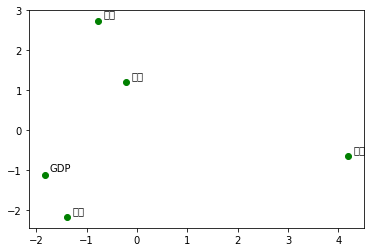

********** 可用的字体 **********


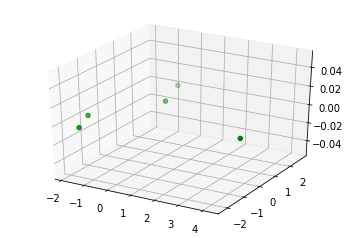

In [85]:
model = model_sg_jp_wzh
words = ['北京', '中期', '國際', '中國', '機構', 'GDP']
plot_2d(model, words)
plot_3d(model, words)

In [86]:
model_CBOW_zh_wzh.most_similar('中期')

[('一段時間', 0.5513943433761597),
 ('長期', 0.5475452542304993),
 ('區間', 0.5148909687995911),
 ('受控', 0.5029595494270325),
 ('較長時間', 0.4981384873390198),
 ('通脹', 0.48503029346466064),
 ('短時期', 0.4841974079608917),
 ('水平', 0.4728330373764038),
 ('通脹率', 0.47151100635528564),
 ('通膨率', 0.46915221214294434)]

********** 可用的字体 **********


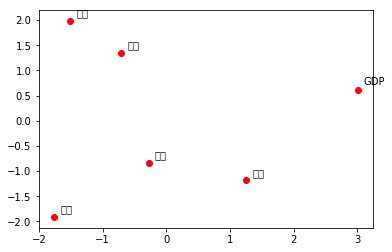

********** 可用的字体 **********


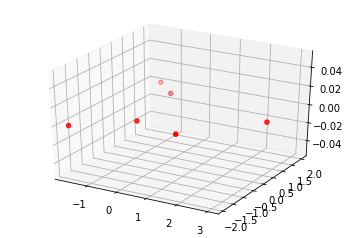

In [87]:
model = model_sg_zh_wzh
words = ['北京', '中期', '國際', '中國', '機構', 'GDP']
plot_2d(model, words, 'r')
plot_3d(model, words, 'r')

In [88]:
from matplotlib.font_manager import FontManager
import subprocess

fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)
#print(mat_fonts)
output = subprocess.check_output('fc-list :lang=zh -f "%{family}\n"', shell=True)
print( '*' * 10, '系统可用的中文字体', '*' * 10)
print (output)
zh_fonts = set(f.split(',', 1)[0] for f in output.decode('utf-8').split('\n'))
available = mat_fonts & zh_fonts
print ('*' * 10, '可用的字体', '*' * 10)
for f in available:
     print (f)

********** 系统可用的中文字体 **********
b'Noto Sans CJK JP,Noto Sans CJK JP Thin\nNoto Sans CJK TC,Noto Sans CJK TC Bold\nNoto Sans CJK KR,Noto Sans CJK KR Medium\nNoto Sans CJK TC,Noto Sans CJK TC Thin\nNoto Sans Mono CJK JP,Noto Sans Mono CJK JP Bold\nNoto Sans Mono CJK KR,Noto Sans Mono CJK KR Bold\nNoto Sans CJK JP,Noto Sans CJK JP Black\nNoto Sans CJK SC,Noto Sans CJK SC Bold\nNoto Sans CJK SC,Noto Sans CJK SC Regular\nNoto Sans CJK JP,Noto Sans CJK JP DemiLight\nNoto Sans CJK TC,Noto Sans CJK TC DemiLight\nNoto Sans Mono CJK JP,Noto Sans Mono CJK JP Regular\nNoto Sans CJK JP,Noto Sans CJK JP Light\nNoto Sans Mono CJK SC,Noto Sans Mono CJK SC Bold\nNoto Sans CJK TC,Noto Sans CJK TC Regular\nNoto Sans CJK SC,Noto Sans CJK SC Medium\nNoto Sans Mono CJK KR,Noto Sans Mono CJK KR Regular\nNoto Sans CJK SC,Noto Sans CJK SC Light\nNoto Sans Mono CJK TC,Noto Sans Mono CJK TC Bold\nNoto Sans CJK SC,Noto Sans CJK SC Black\nNoto Sans CJK TC,Noto Sans CJK TC Medium\nNoto Sans CJK TC,Noto Sans CJK TC 

In [89]:
import matplotlib
matplotlib.matplotlib_fname()

'/home/R2016hwang/.pyenv/versions/3.6.2/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'

In [90]:
vocab = model_CBOW_zh_wzh.wv.vocab

In [91]:
vocab

{'中國': <gensim.models.keyedvectors.Vocab at 0x7f14ab3d6710>,
 '經濟': <gensim.models.keyedvectors.Vocab at 0x7f1485cf5f28>,
 '惠譽': <gensim.models.keyedvectors.Vocab at 0x7f1485cf53c8>,
 '預計': <gensim.models.keyedvectors.Vocab at 0x7f1485cfd940>,
 'GDP': <gensim.models.keyedvectors.Vocab at 0x7f1485cfd2e8>,
 '增速': <gensim.models.keyedvectors.Vocab at 0x7f1485d5ae48>,
 '今明兩年': <gensim.models.keyedvectors.Vocab at 0x7f1485d5a2e8>,
 '放緩': <gensim.models.keyedvectors.Vocab at 0x7f1485d5a3c8>,
 '至': <gensim.models.keyedvectors.Vocab at 0x7f1485d5a6d8>,
 '與': <gensim.models.keyedvectors.Vocab at 0x7f1485d5a668>,
 '但': <gensim.models.keyedvectors.Vocab at 0x7f1485d368d0>,
 '中期': <gensim.models.keyedvectors.Vocab at 0x7f1485d363c8>,
 '前景': <gensim.models.keyedvectors.Vocab at 0x7f1485d36710>,
 '看好': <gensim.models.keyedvectors.Vocab at 0x7f1485d36c18>,
 '路透': <gensim.models.keyedvectors.Vocab at 0x7f1485d36358>,
 '北京': <gensim.models.keyedvectors.Vocab at 0x7f1485d36cc0>,
 '日電': <gensim.models.ke

In [92]:
vocab = model_sg_en_wzh.wv.vocab

In [93]:
vocab

{'china': <gensim.models.keyedvectors.Vocab at 0x7f147762a470>,
 'slow': <gensim.models.keyedvectors.Vocab at 0x7f147784cf28>,
 'mid-term': <gensim.models.keyedvectors.Vocab at 0x7f1477513c18>,
 'prospect': <gensim.models.keyedvectors.Vocab at 0x7f14775ec7f0>,
 'beijing': <gensim.models.keyedvectors.Vocab at 0x7f1477700048>,
 'june': <gensim.models.keyedvectors.Vocab at 0x7f1477700668>,
 'reuters': <gensim.models.keyedvectors.Vocab at 0x7f1477dad160>,
 'economy': <gensim.models.keyedvectors.Vocab at 0x7f1477a00860>,
 'will': <gensim.models.keyedvectors.Vocab at 0x7f147c16a2e8>,
 'year': <gensim.models.keyedvectors.Vocab at 0x7f147c16a9b0>,
 'next': <gensim.models.keyedvectors.Vocab at 0x7f14777209e8>,
 'government': <gensim.models.keyedvectors.Vocab at 0x7f1477720780>,
 'curb': <gensim.models.keyedvectors.Vocab at 0x7f1477720400>,
 'investment': <gensim.models.keyedvectors.Vocab at 0x7f14774a7ac8>,
 'bite': <gensim.models.keyedvectors.Vocab at 0x7f14774a7358>,
 'it': <gensim.models.key

In [94]:
vocab = model_CBOW_jp_wzh.wv.vocab

In [95]:
vocab

{'中国': <gensim.models.keyedvectors.Vocab at 0x7f1638b650f0>,
 '経済成長': <gensim.models.keyedvectors.Vocab at 0x7f14aa2d4f28>,
 'やや': <gensim.models.keyedvectors.Vocab at 0x7f14aa2d4fd0>,
 '減速': <gensim.models.keyedvectors.Vocab at 0x7f14aa2d4978>,
 '中期': <gensim.models.keyedvectors.Vocab at 0x7f14aa2d40b8>,
 '見通し': <gensim.models.keyedvectors.Vocab at 0x7f14ab3780b8>,
 '良好': <gensim.models.keyedvectors.Vocab at 0x7f14ab3781d0>,
 'フィッチ': <gensim.models.keyedvectors.Vocab at 0x7f14ab1785f8>,
 '北京': <gensim.models.keyedvectors.Vocab at 0x7f14ab178ba8>,
 'ロイター': <gensim.models.keyedvectors.Vocab at 0x7f14ab178f28>,
 'フィッチ・レーティングス': <gensim.models.keyedvectors.Vocab at 0x7f14ab178470>,
 '中国政府': <gensim.models.keyedvectors.Vocab at 0x7f14ab1786a0>,
 '投資': <gensim.models.keyedvectors.Vocab at 0x7f14ab178860>,
 '引き締め': <gensim.models.keyedvectors.Vocab at 0x7f14ab1780b8>,
 'する': <gensim.models.keyedvectors.Vocab at 0x7f14ab242da0>,
 '発表': <gensim.models.keyedvectors.Vocab at 0x7f14ab044cf8>,
 '一

In [96]:
model_CBOW_en_wzh["china"].shape

(200,)

In [ ]:
/home/R2016hwang